## Importing Packages and Libraries

In [403]:
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import scipy.stats as stats

sns.set(color_codes=True)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


import datetime
import scipy.stats as stats
from scipy.stats import norm
import pylab
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
# from statsmodels.formula.api import ols
# import statsmodels.stats.api as sms
# import statsmodels.api as sm
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

## Importing Dataset to Jupyter Notebooks

In [307]:
DataSet = pd.read_excel("D:\\McCombs Data Analytics Course\\Jupyter Notebook Files\\Proj 5 - Ensemble Techniques\\Tourism.xlsx", sheet_name='Tourism')
Data = pd.read_excel("D:\\McCombs Data Analytics Course\\Jupyter Notebook Files\\Proj 5 - Ensemble Techniques\\Tourism.xlsx", sheet_name='Tourism')

In [11]:
DataSet.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Problem Definition
### Travel Package Purchase Prediction

<u><b> OBJECTIVE </b></u>
- Explore and visualize the dataset.<br>
- Data Preprocessing. <br>
- Analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.<br>
- To predict which customer is more likely to purchase the newly introduced travel package.<br>
- Testing of Assumptions and Model Performance Evaluation of Bagging (bagging classifier, random forest, and decision tree.) and Boosting (Adaboost, gradient boost, xgboost, and stacking classifier) Models. <br>
- Model Performance Evaluation
- Generate a set of insights and recommendations. <br>


## Basic Information on the Attributes in the Initial DataSet

<u><b> TYPES OF ATTRIBUTES </b></u>

In [12]:
DataSet.dtypes

CustomerID                    int64
ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

There are 7 attributes of type INTEGER. <br>
There is 7 attributes of type FLOAT. <br>
There are 6 attributes of type OBJECT. <br>
TOTAL : 20 Attributes. <br>

<u><b> ANY MISSING VALUES IN THE DATASET? </b></u>

In [288]:
DataSet.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

There are 8 attributes with Missing values. In DESCENDING ORDER of most missing values they are as follows: <br>
<i>DurationOfPitch > MonthlyIncome > Age > NumberOfTrips > NumberOfChildrenVisiting > NumberOfFollowups > PreferredPropertyStar > TypeofContact. </i><br>
These missing values will be dealt with in Data Preprocessing

<u><b> SUMMARIZED DATASET </b></u>

In [14]:
DataSet.describe(include="all")

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4863,4888.000000,4637.000000,4888,4888,4888.000000,4843.000000,4888,4862.000000,4888,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4888,4655.000000
unique,NaN,NaN,NaN,2,NaN,NaN,4,3,NaN,NaN,5,NaN,4,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,Self Enquiry,NaN,NaN,Salaried,Male,NaN,NaN,Basic,NaN,Married,NaN,NaN,NaN,NaN,NaN,Executive,NaN
freq,NaN,NaN,NaN,3444,NaN,NaN,2368,2916,NaN,NaN,1842,NaN,2340,NaN,NaN,NaN,NaN,NaN,1842,NaN
mean,202443.500000,0.188216,37.622265,NaN,1.654255,15.490835,NaN,NaN,2.905074,3.708445,NaN,3.581037,NaN,3.236521,0.290917,3.078151,0.620295,1.187267,NaN,23619.853491
std,1411.188388,0.390925,9.316387,NaN,0.916583,8.519643,NaN,NaN,0.724891,1.002509,NaN,0.798009,NaN,1.849019,0.454232,1.365792,0.485363,0.857861,NaN,5380.698361
min,200000.000000,0.000000,18.000000,NaN,1.000000,5.000000,NaN,NaN,1.000000,1.000000,NaN,3.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,1000.000000
25%,201221.750000,0.000000,31.000000,NaN,1.000000,9.000000,NaN,NaN,2.000000,3.000000,NaN,3.000000,NaN,2.000000,0.000000,2.000000,0.000000,1.000000,NaN,20346.000000
50%,202443.500000,0.000000,36.000000,NaN,1.000000,13.000000,NaN,NaN,3.000000,4.000000,NaN,3.000000,NaN,3.000000,0.000000,3.000000,1.000000,1.000000,NaN,22347.000000
75%,203665.250000,0.000000,44.000000,NaN,3.000000,20.000000,NaN,NaN,3.000000,4.000000,NaN,4.000000,NaN,4.000000,1.000000,4.000000,1.000000,2.000000,NaN,25571.000000


<u><b> DIMENSIONS OF THE  DATASET (ROWS AND COLUMNS) </b></u>

In [15]:
DataSet.shape

(4888, 20)

There are 4888 rows and 20 columns

<u><b> CORRELATIONS BETWEEN ATTRIBUTES </b></u>

In [16]:
DataSet.corr()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
CustomerID,1.000000,0.056506,0.032127,0.012975,0.064298,0.604013,0.427539,0.010553,0.224848,0.007974,-0.035847,0.003805,0.511763,0.276833
ProdTaken,0.056506,1.000000,-0.147254,0.086852,0.078257,0.009627,0.112171,0.099577,0.018898,0.260844,0.051394,-0.011508,0.007421,-0.130585
Age,0.032127,-0.147254,1.000000,-0.015625,-0.012063,0.011621,-0.002577,-0.010474,0.184905,0.033399,0.018510,0.048654,0.007370,0.464869
CityTier,0.012975,0.086852,-0.015625,1.000000,0.022703,-0.001671,0.023652,-0.009164,-0.029709,0.001793,-0.042160,0.003817,0.000672,0.051817
DurationOfPitch,0.064298,0.078257,-0.012063,0.022703,1.000000,0.065141,0.009434,-0.006637,0.009715,0.033034,-0.002880,-0.001626,0.031408,-0.006252
NumberOfPersonVisiting,0.604013,0.009627,0.011621,-0.001671,0.065141,1.000000,0.328569,0.033867,0.195223,0.011177,-0.019581,0.010362,0.610621,0.195134
NumberOfFollowups,0.427539,0.112171,-0.002577,0.023652,0.009434,0.328569,1.000000,-0.024176,0.139517,0.004970,0.004054,0.012112,0.286425,0.176503
PreferredPropertyStar,0.010553,0.099577,-0.010474,-0.009164,-0.006637,0.033867,-0.024176,1.000000,0.012115,0.001040,-0.022701,0.015742,0.035798,0.014289
NumberOfTrips,0.224848,0.018898,0.184905,-0.029709,0.009715,0.195223,0.139517,0.012115,1.000000,0.012949,-0.004378,-0.011825,0.168795,0.139105
Passport,0.007974,0.260844,0.033399,0.001793,0.033034,0.011177,0.004970,0.001040,0.012949,1.000000,0.002926,-0.022330,0.020264,0.002545


<u><b> SKEWNESS IN THE DATASET </b></u>

In [17]:
DataSet.skew()

CustomerID                  0.000000
ProdTaken                   1.595763
Age                         0.382989
CityTier                    0.736531
DurationOfPitch             1.752037
NumberOfPersonVisiting      0.029817
NumberOfFollowups          -0.372719
PreferredPropertyStar       0.895545
NumberOfTrips               1.453884
Passport                    0.920980
PitchSatisfactionScore     -0.127726
OwnCar                     -0.495892
NumberOfChildrenVisiting    0.272199
MonthlyIncome               1.949160
dtype: float64

- NumberOfFollowups, PitchSatisfactionScore and OwnCar have NEGATIVE skew.
- MonthlyIncome, NumberOfTrips, DurationOfPitch and ProdTaken have high POSITIVE skew. 

## Data Pre-Processing I
<b> This part of Data Preprocessing is done to understand the DataSet better and for UNIVARIATE and BIVARIATE Exploratory Data Analysis. <br>Further Data Preprocessing will be done after EDA is complete.</b><br>

In [309]:
df = Data

#### STEP 1 : DROP UNNECESSARY COLUMNS
In this case; 
- <b>CustomerID</b> column will not be used to make any deductions. Hence it shall be dropped. 


In [310]:
df.drop(['CustomerID'],axis=1, inplace=True)
df.shape

(4888, 19)

The Number of columns has now reduced to 19.

#### STEP 2 : PROCESSING COLUMNS
In this case;

<b>1) <u>Gender</u></b>

In [311]:
df['Gender'].value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

There is a space in between the word "Female" turning it into "Fe Male". The letter "M" is also capitalized in the middle of the word which is a deviation from the standard spelling of the word.<br>
This has to be corrected. 

In [312]:
df['Gender'] = df['Gender'].apply(lambda x: x.replace(' ','').capitalize())

In [313]:
df['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

The Error has been corrected. 

In [314]:
df['TypeofContact'].value_counts()

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

<b>2) <u>Other Columns / Attributes</u></b>
- Remaining columns seem to be fine and no data cleaning is required

<b> Missing Value Treatment; Outlier Treatment; etc. will be dealt with in Data Preprocessing II</b>

## Univariate Analysis of Variables

<u><b> HISTOGRAM PLOT OF NUMERICAL VARIABLES TO SHOW DISTRIBUTION </b></u>

array([[<AxesSubplot:title={'center':'ProdTaken'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'CityTier'}>,
        <AxesSubplot:title={'center':'DurationOfPitch'}>],
       [<AxesSubplot:title={'center':'NumberOfPersonVisiting'}>,
        <AxesSubplot:title={'center':'NumberOfFollowups'}>,
        <AxesSubplot:title={'center':'PreferredPropertyStar'}>,
        <AxesSubplot:title={'center':'NumberOfTrips'}>],
       [<AxesSubplot:title={'center':'Passport'}>,
        <AxesSubplot:title={'center':'PitchSatisfactionScore'}>,
        <AxesSubplot:title={'center':'OwnCar'}>,
        <AxesSubplot:title={'center':'NumberOfChildrenVisiting'}>],
       [<AxesSubplot:title={'center':'MonthlyIncome'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

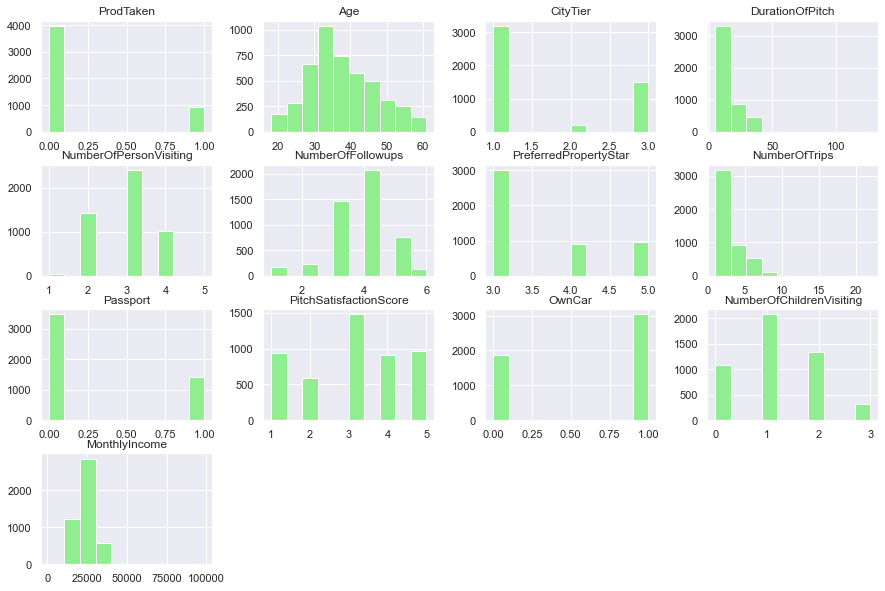

In [48]:
df.hist(figsize=(15,10), color = 'lightgreen')

Histogram Plots of the various numerical Attributes present in the given Dataset. It shows the frequency of each element within the attribute. <br>
##### Observations
- Age seems to be mostly normally distributed <br>
- MonthlyIncome, NumberOfTrips, DurationOfPitch and ProdTaken have very high POSITIVE skew.<br>


<u><b> AGE DISTRIBUTION </b></u>

<AxesSubplot:xlabel='Age'>

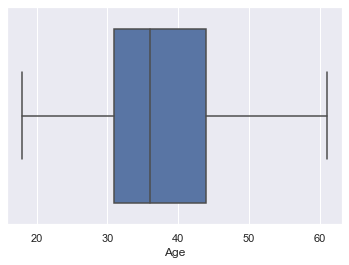

In [49]:
sns.boxplot(df['Age'])

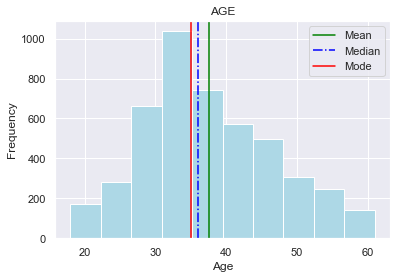

In [50]:
plt.hist(df['Age'], color = 'lightblue')
plt.axvline(df['Age'].mean(), color = 'green', label = 'Mean')
plt.axvline(df['Age'].median(), color = 'blue', label = 'Median', linestyle = 'dashdot')
plt.axvline(df['Age'].mode()[0], color = 'red', label = 'Mode')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("AGE")
plt.legend()

##### Observations
- Age, for the most part, seems to be normally distributed. 
- Most of the customers are concentrated around the age range of 30 - 40 years.
- Mode < Median < Mean 
- No outliers

<u><b> DURATION OF PITCH DISTRIBUTION </b></u>

<AxesSubplot:xlabel='DurationOfPitch'>

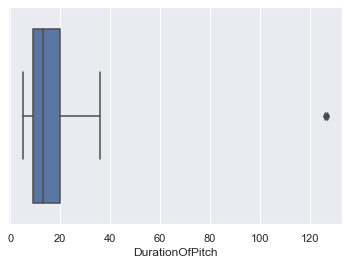

In [69]:
sns.boxplot(df['DurationOfPitch'])

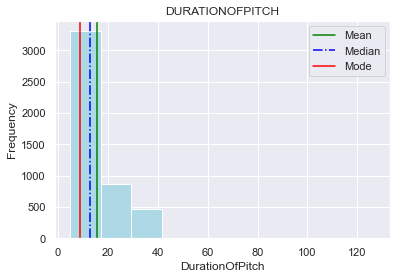

In [70]:
plt.hist(df['DurationOfPitch'], color = 'lightblue')
plt.axvline(df['DurationOfPitch'].mean(), color = 'green', label = 'Mean')
plt.axvline(df['DurationOfPitch'].median(), color = 'blue', label = 'Median', linestyle = 'dashdot')
plt.axvline(df['DurationOfPitch'].mode()[0], color = 'red', label = 'Mode')
plt.xlabel('DurationOfPitch')
plt.ylabel('Frequency')
plt.title("DURATIONOFPITCH")
plt.legend()

##### Observations
- Duration of Pitch is highly positive skewed
- Mode < Median < Mean
- Outliers present

<u><b> MONTHLY INCOME DISTRIBUTION </b></u>

<AxesSubplot:xlabel='MonthlyIncome'>

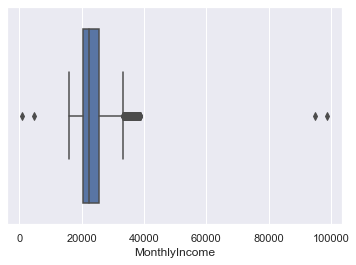

In [71]:
sns.boxplot(df['MonthlyIncome'])

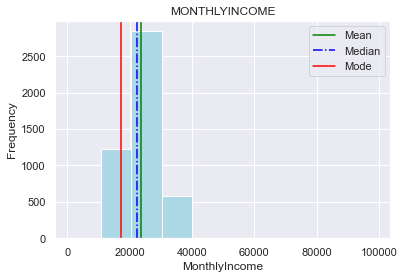

In [72]:
plt.hist(df['MonthlyIncome'], color = 'lightblue')
plt.axvline(df['MonthlyIncome'].mean(), color = 'green', label = 'Mean')
plt.axvline(df['MonthlyIncome'].median(), color = 'blue', label = 'Median', linestyle = 'dashdot')
plt.axvline(df['MonthlyIncome'].mode()[0], color = 'red', label = 'Mode')
plt.xlabel('MonthlyIncome')
plt.ylabel('Frequency')
plt.title("MONTHLYINCOME")
plt.legend()

##### Observations
- Mode < Median < Mean
- Monthly Income is mostly concentrated around 10,000 to 40,000
- Peaks in the 20,000 to 30,000 range.

<u><b> MONTHLY INCOME DISTRIBUTION </b></u>

In [2]:
sns.boxplot(df['MonthlyIncome'])

NameError: name 'sns' is not defined

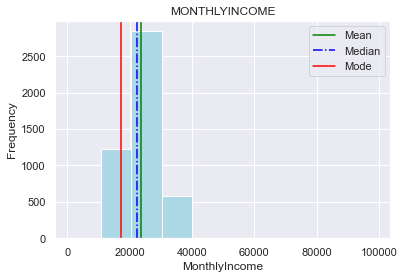

In [72]:
plt.hist(df['MonthlyIncome'], color = 'lightblue')
plt.axvline(df['MonthlyIncome'].mean(), color = 'green', label = 'Mean')
plt.axvline(df['MonthlyIncome'].median(), color = 'blue', label = 'Median', linestyle = 'dashdot')
plt.axvline(df['MonthlyIncome'].mode()[0], color = 'red', label = 'Mode')
plt.xlabel('MonthlyIncome')
plt.ylabel('Frequency')
plt.title("MONTHLYINCOME")
plt.legend()

##### Observations
- Mode < Median < Mean
- Monthly Income is mostly concentrated around 10,000 to 40,000
- Peaks in the 20,000 to 30,000 range.

<u><b> PRODUCT TAKEN DISTRIBUTION </b></u>

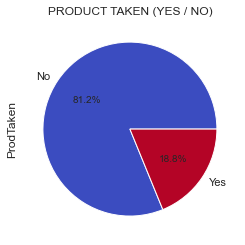

In [60]:
df1 = df['ProdTaken'].value_counts()
label1 = ['No','Yes']
df1.plot.pie(cmap = 'coolwarm', autopct='%2.1f%%',radius=1, labels=label1)
plt.title("PRODUCT TAKEN (YES / NO)")
plt.show()

##### Observations
- Almost 80% of the dataset has not purchased the travel package

<u><b> TYPE OF CONTACT DISTRIBUTION </b></u>

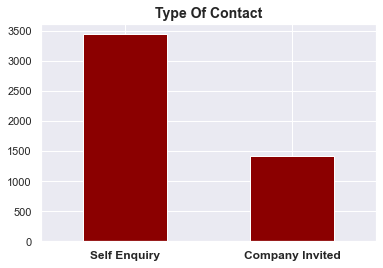

In [68]:
df2 = df['TypeofContact'].value_counts()
df2.plot.bar(color='darkred')
plt.title('Type Of Contact', fontsize=14, fontweight='bold');
plt.xticks(np.arange(0,2),['Self Enquiry', 'Company Invited'], fontsize=12, fontweight='bold', rotation = 0);

##### Observations
- Most customers found about the travel packages on self inquiry rather than company invited

<u><b> CITY TIER DISTRIBUTION </b></u>

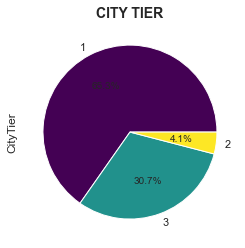

In [82]:
df3 = df['CityTier'].value_counts()
df3.plot.pie(cmap='viridis',autopct='%2.1f%%',radius=1,)
plt.title('CITY TIER', fontsize=14, fontweight='bold');


##### Observations
- Tier 1 has the most number of customers followed by Tier 3 and then by Tier 2.
- Ordered based on development; Tier 1 is the most devloped followed by Tier 2 and then Tier 3.

<u><b> OCCUPATION DISTRIBUTION </b></u>

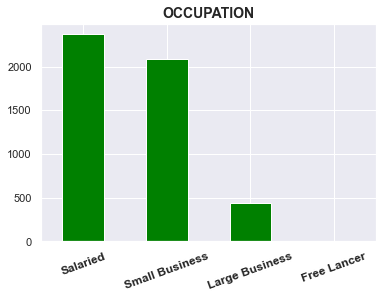

In [88]:
df4 = df['Occupation'].value_counts()
df4.plot.bar(color='green')
plt.title('OCCUPATION', fontsize=14, fontweight='bold');
plt.xticks(np.arange(0,4),['Salaried', 'Small Business', 'Large Business', 'Free Lancer'], fontsize=12, fontweight='bold', rotation=20);

##### Observations
- Salaried Customers lead the dataset with numbers over 2000 followed by Small Business which also crosses the 2000 mark.
- Large Business Customers are third with a little less than 500 people followed by Free Lancers which arevery few in number which is why they cannot be depicted on the graph due to the large scale. 

<u><b> GENDER DISTRIBUTION </b></u>

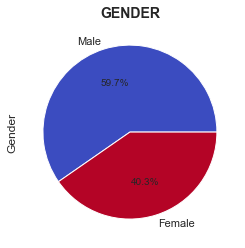

In [86]:
df5 = df['Gender'].value_counts()
df5.plot.pie(cmap='coolwarm',autopct='%2.1f%%',radius=1)
plt.title('GENDER', fontsize=14, fontweight='bold');


##### Observations
- Most customers are Male accounting for 60% of the dataset.
- Female Customers account for 40% of the dataset.

<u><b> NUMBER OF PERSON VISITING DISTRIBUTION </b></u>

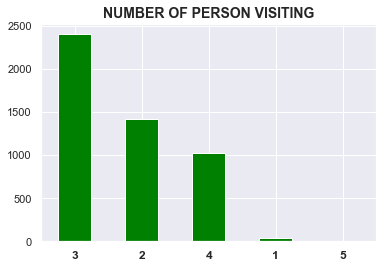

In [96]:
df6 = df['NumberOfPersonVisiting'].value_counts()
df6.plot.bar(color='green')
plt.title('NUMBER OF PERSON VISITING', fontsize=14, fontweight='bold');
plt.xticks(fontsize=12, fontweight='bold', rotation=0);

##### Observations
- Most customers have 3 people visiting along with them, accounting for almost 2300 customers.
- Followed by 2 and 4 people, each of which have customers in the range of 1000 - 1500 

<u><b> NUMBER OF FOLLOW UPS DISTRIBUTION </b></u>

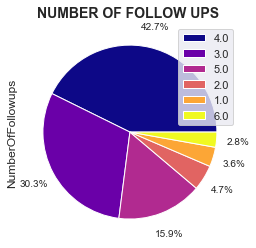

In [101]:
df7 = df['NumberOfFollowups'].value_counts()
labels7 = ['4.0','3.0','5.0','2.0','1.0','6.0']
df7.plot.pie(cmap='plasma',autopct='%2.1f%%',pctdistance = 1.25,radius=1,labels=None)
plt.title('NUMBER OF FOLLOW UPS ', fontsize=14, fontweight='bold');
plt.legend(labels7,loc = "upper right")

##### Observations
- Almost 40% of the Dataset has 4 followups done by the sales person
- It is followed by 3 and 5 followups each accounting for 30% and 16% of the dataset.
- 2,1 and 6 followups account for less then 10% of the dataset together

<u><b> PRODUCT PITCHED DISTRIBUTION </b></u>

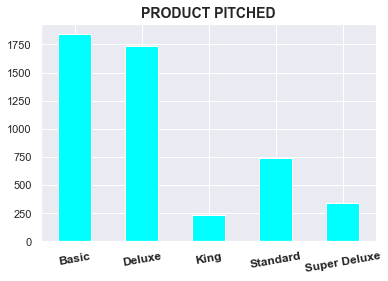

In [113]:
df8 = df['ProductPitched'].value_counts().sort_index()
df8.plot.bar(color='cyan')
plt.title('PRODUCT PITCHED', fontsize=14, fontweight='bold');
plt.xticks(fontsize=12, fontweight='bold', rotation=10);

##### Observations
- Most widely pitched travel package is the Basic Travel Package followed by the Deluxe, King, Standard and Super Deluxe

<u><b> PREFERRED PROPERTY STAR DISTRIBUTION </b></u>

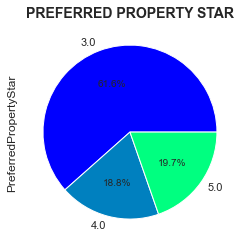

In [116]:
df9 = df['PreferredPropertyStar'].value_counts().sort_index()
df9.plot.pie(cmap='winter',autopct='%2.1f%%',radius=1)
plt.title('PREFERRED PROPERTY STAR', fontsize=14, fontweight='bold');


##### Observations
- The most Preferred Property Star is 3 accounting for 61% of the dataset followed by 4 at 18.8% and 5 at 18.7%

<u><b> MARITAL STATUS DISTRIBUTION </b></u>

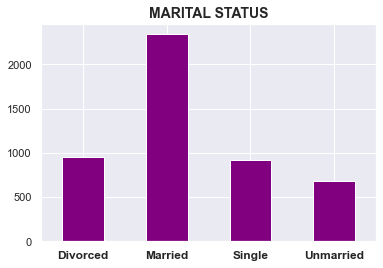

In [119]:
df10 = df['MaritalStatus'].value_counts().sort_index()
df10.plot.bar(color='purple')
plt.title('MARITAL STATUS', fontsize=14, fontweight='bold');
plt.xticks(fontsize=12, fontweight='bold', rotation=0);

##### Observations
- Over 2000 customers are married then followed by Divorced and Single which are in the same range
- Least number of customers are unmarried. 

<u><b> NUMBER OF TRIPS DISTRIBUTION </b></u>

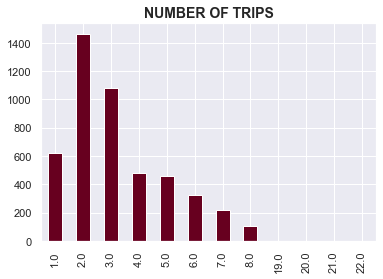

In [129]:
df11 = df['NumberOfTrips'].value_counts().sort_index()
df11.plot.bar(cmap="RdBu")
plt.title('NUMBER OF TRIPS', fontsize=14, fontweight='bold');
plt.xlabel('', fontsize=12, fontweight='bold');

##### Observations
- Most customers have 2 - 3 annual trips 
- On the lower range we have 1, 4, 5, 6, 7 and 8 annual trips.
- very few customers have 19 - 22 annual trips and the numbers are almost negligible on a large scale. 

<u><b> PASSPORT DISTRIBUTION </b></u>

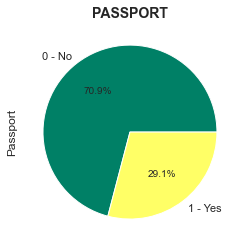

In [150]:
df12 = df['Passport'].value_counts().sort_index()
df12.plot.pie(cmap='summer', labels = labels12,autopct='%2.1f%%',radius=1)
labels12 = ["0 - No","1 - Yes"]
plt.title('PASSPORT', fontsize=14, fontweight='bold');
plt.xticks(fontsize=12, fontweight='bold', rotation=0);

##### Observations
- Most customers do not have a passpirt accounting for 71% of the dataset.

<u><b> PITCH SATISFACTION SCORE DISTRIBUTION </b></u>

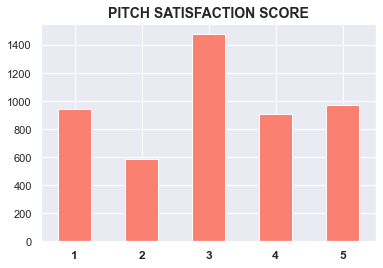

In [140]:
df13 = df['PitchSatisfactionScore'].value_counts().sort_index()
df13.plot.bar(color='salmon')
plt.title('PITCH SATISFACTION SCORE', fontsize=14, fontweight='bold');
plt.xticks(fontsize=12, fontweight='bold', rotation=0);

##### Observations
- The most common pitch satisfation score is 3 followed by 5, 1, 4 and 2.

<u><b> OWN CAR DISTRIBUTION </b></u>

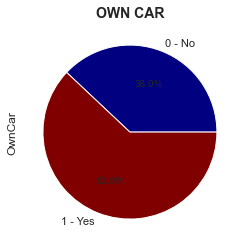

In [151]:
df13 = df['OwnCar'].value_counts().sort_index()
df13.plot.pie(cmap='jet', labels = labels12,autopct='%2.1f%%',radius=1)
labels12 = ["0 - No","1 - Yes"]
plt.title('OWN CAR', fontsize=14, fontweight='bold');
plt.xticks(fontsize=12, fontweight='bold', rotation=0);

##### Observations
- 62% of the dataset of customers have cars.
- Only 38% of customers do not have cars.

<u><b> NUMBER OF CHILDREN VISITING DISTRIBUTION </b></u>

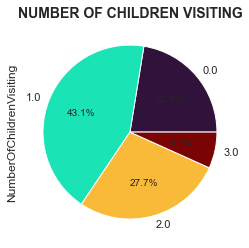

In [152]:
df14 = df['NumberOfChildrenVisiting'].value_counts().sort_index()
df14.plot.pie(cmap="turbo",autopct='%2.1f%%',radius=1)
plt.title('NUMBER OF CHILDREN VISITING', fontsize=14, fontweight='bold');


##### Observations
- Most customers have 1 child visiting along with them followed by no, 2 and 3 children.

<u><b> PRODUCT PITCHED DISTRIBUTION </b></u>

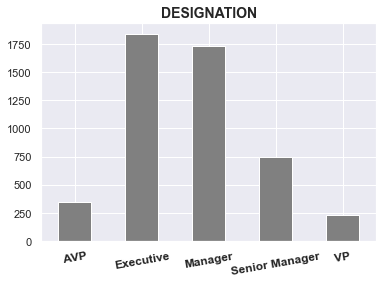

In [153]:
df15 = df['Designation'].value_counts().sort_index()
df15.plot.bar(color='grey')
plt.title('DESIGNATION', fontsize=14, fontweight='bold');
plt.xticks(fontsize=12, fontweight='bold', rotation=10);

##### Observations
- Over 1750 customers are excutives at their places of work followed by Managers, Senior Managers, AVP and VP

## Bivariate and Multivariate Analysis of Variables

<u><b> HEAT MAP SHOWING CORRELATION BETWEEN VARIABLES </b></u>

<AxesSubplot:>

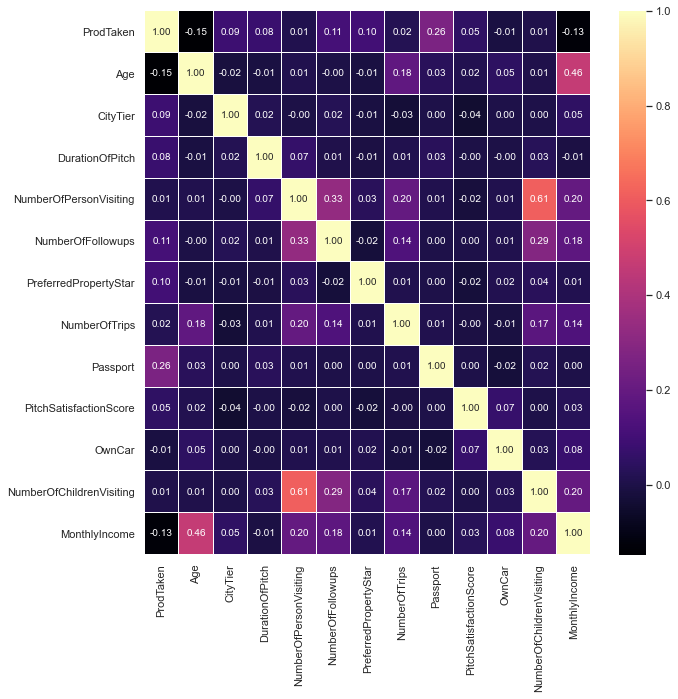

In [154]:
fig, ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), ax=ax, annot = True, linewidths = 0.05, fmt = '.2f', cmap="magma")

##### Observations
This Heat Map shows the correlation between the individual attributes. With this we can draw the following inferences : 
1) There is distributed correlation between the attributes of this dataset. <br>
2) The Highest Correlation is between 'Number of Children Visiting' and 'Number of Persons Visiting' with 0.61.<br>
3) The Lowest Correlation is between 'Age' and 'ProdTaken' with -0.15 (Negative).<br>
4) Since ProdTaken is our target variable; the correlations of other columns with ProdTaken; like Age, CityTier, DurationofPitch, OwnCar, MonthlyIncome and NumberOfTrips have very low correlations.


<u><b> PAIRPLOT BETWEEN VARIABLES </b></u>

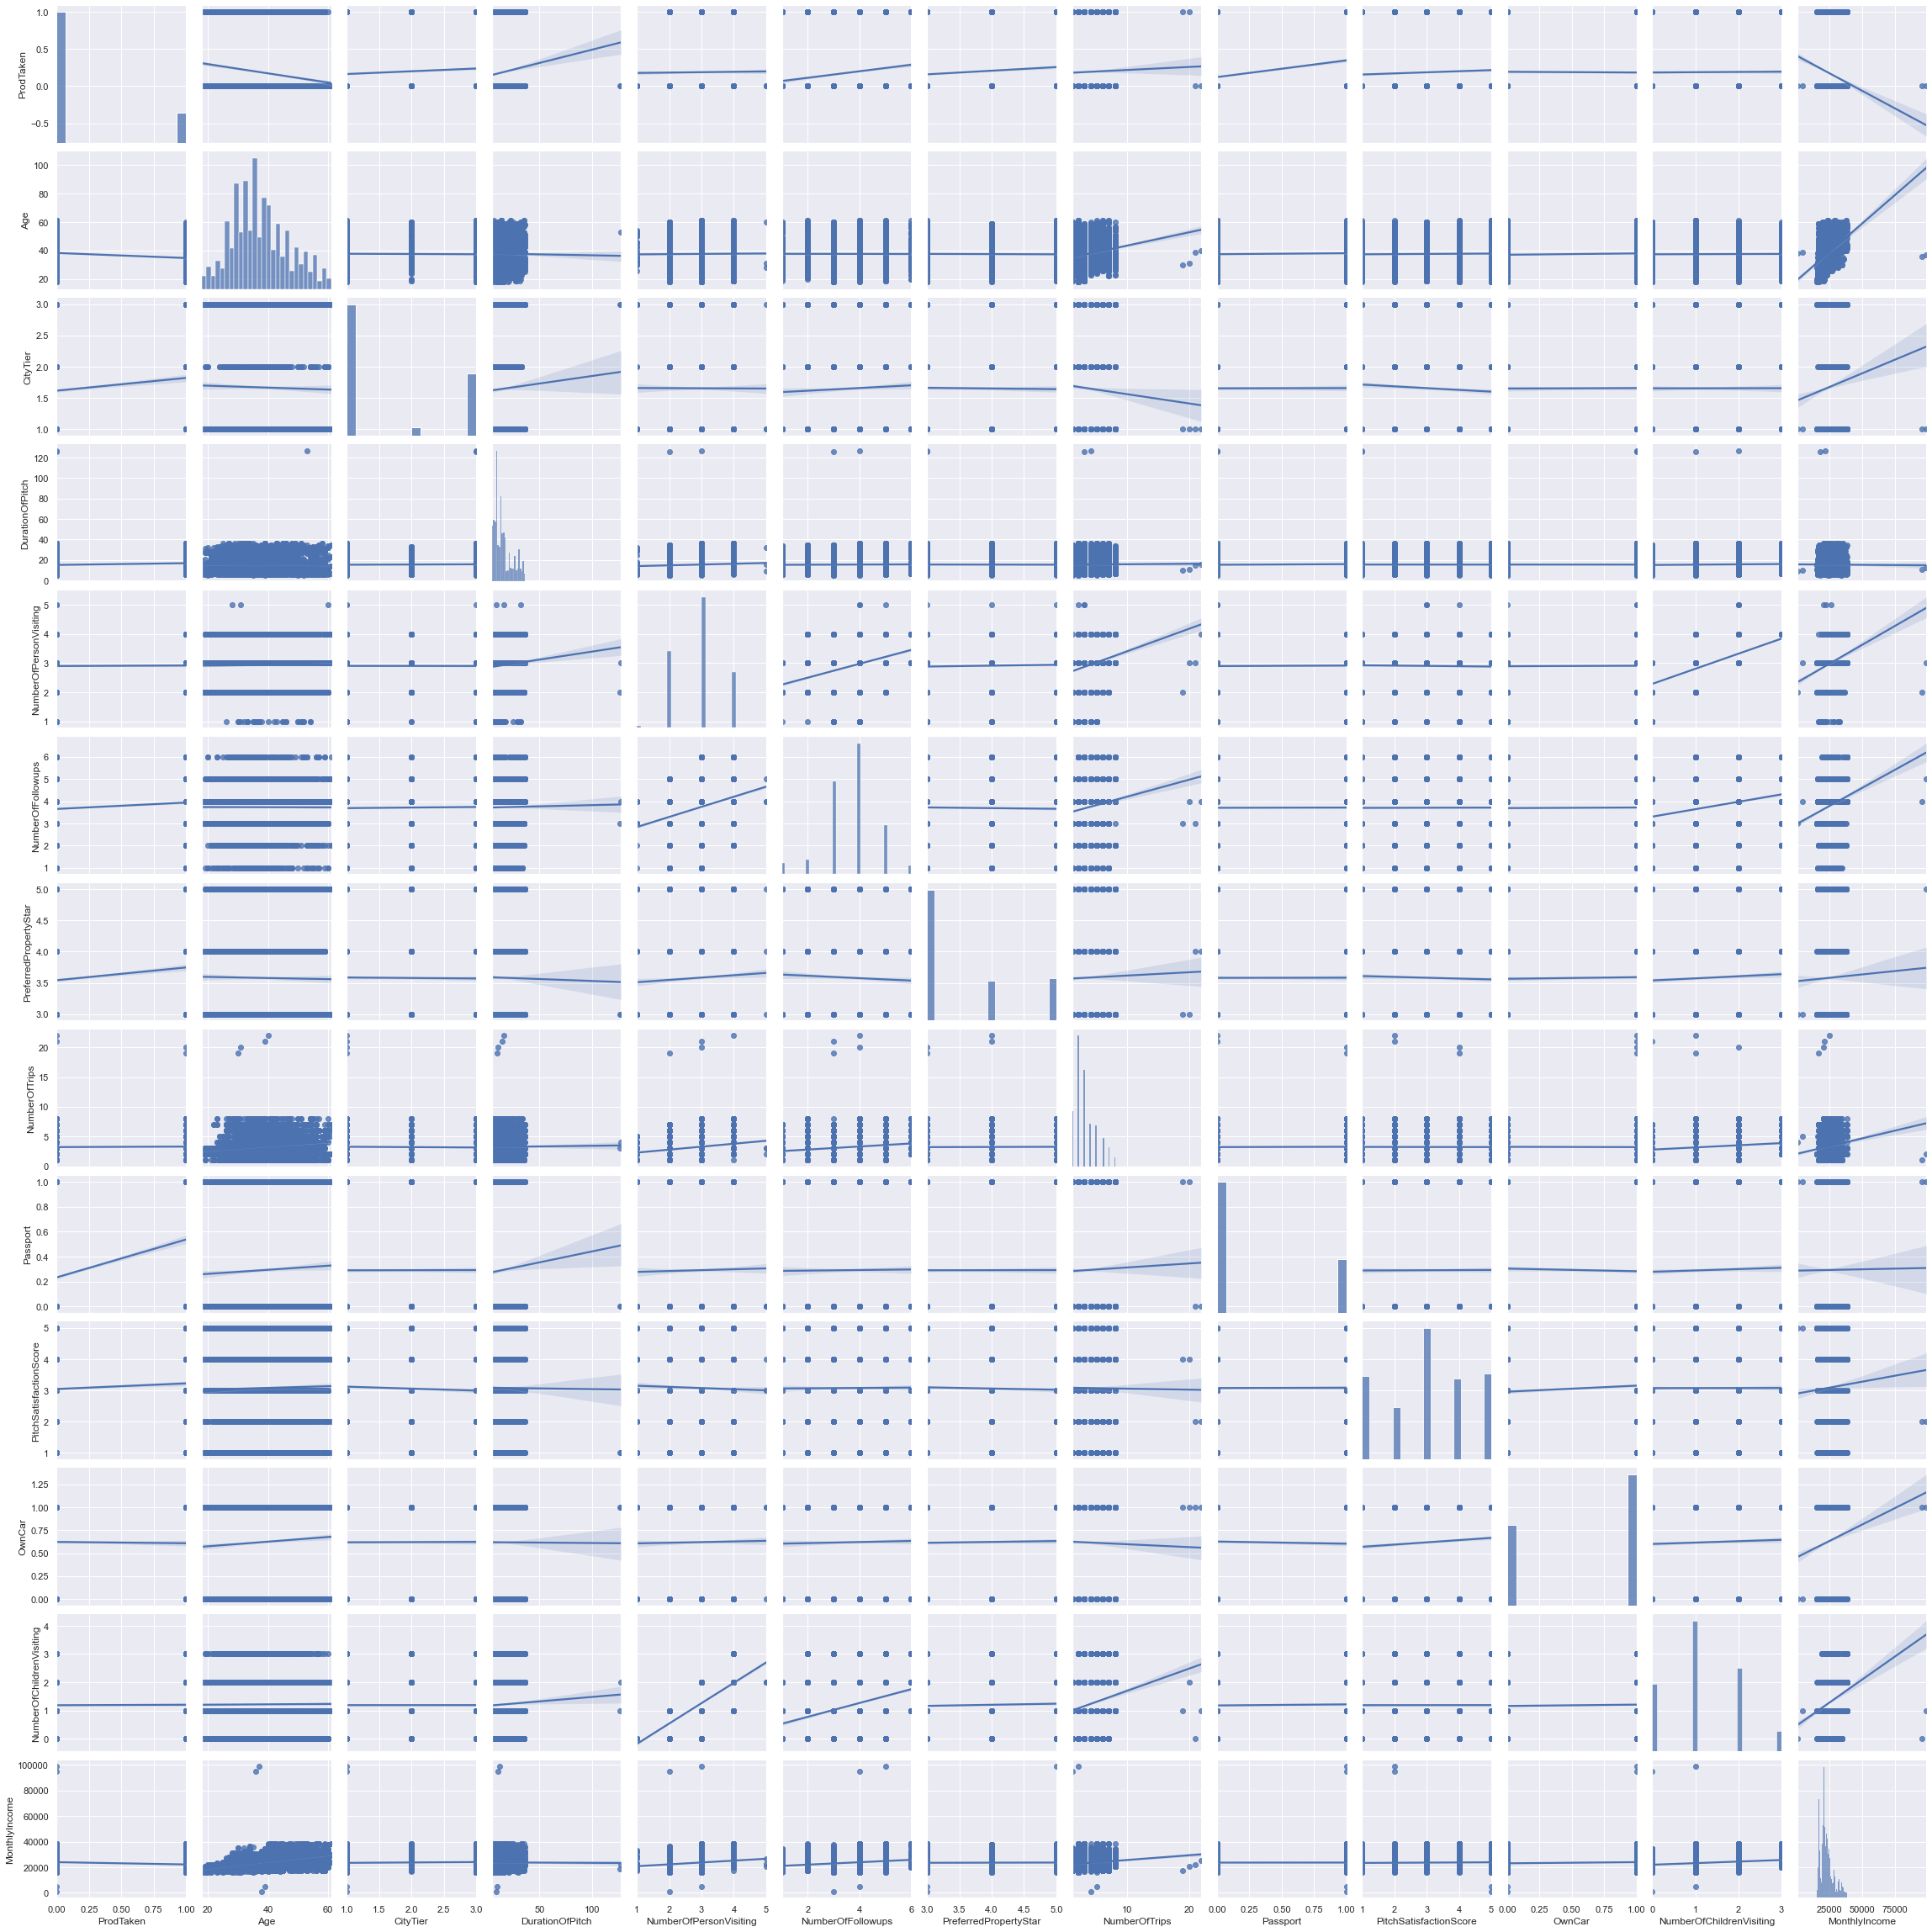

In [155]:
sns.pairplot(df,kind = 'reg')

##### Observations
Pairplot to show the relationship between the different variables. It is a more graphical representation of the Correlation Heat Map. 

<u><b> PRODUCTPITCHED v/s MONTHLYINCOME v/s PRODTAKEN </b></u>

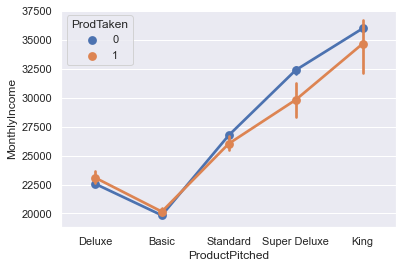

In [160]:
plot1 = sns.pointplot(df['ProductPitched'],df['MonthlyIncome'],hue = df['ProdTaken'])

##### Observations
- Customers that were pitched the Basic Package have the lowest Monthly Income. 
- Across all the products pitched, the number of customers that opted for the package and did not opt for the package are roughly the same with a little discrpancy in Super Deluxe and King Packages. 
- Customers that were pitched the Super Deluxe and King Packages have the highest monthly income.


<u><b> DURATIONOFPITCH v/s PRODTAKEN </b></u>

Text(0.5, 1.0, 'Duration of Pitch v/s Product Taken Distribution')

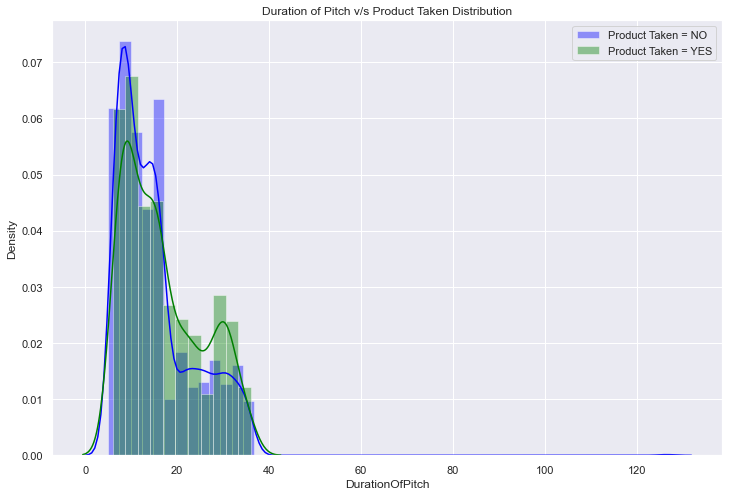

In [182]:
plt.figure(figsize=(12,8))
sns.distplot(df[df['ProdTaken'] == 0]['DurationOfPitch'],kde=True, color='blue', label='Product Taken = NO')
sns.distplot(df[df['ProdTaken'] == 1]['DurationOfPitch'],kde=True, color='green',label='Product Taken = YES')
plt.legend()
plt.title("Duration of Pitch v/s Product Taken Distribution")

##### Observations
- The number of customers that puchased the travel packages decreased with the increase in the duration of pitch. 
- Duration of pitch in the range of 0 - 20 have the highest number of customers that purchased the travel package. 

<u><b> AGE v/s DESIGNATION </b></u>

Text(0.5, 1.0, 'Age Distribution')

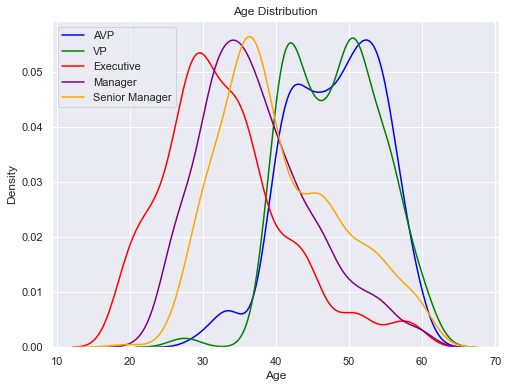

In [254]:
plt.figure(figsize=(8,6))
sns.distplot(df[df['Designation'] == "AVP"]['Age'],kde=True,hist = False, color='blue', label='AVP')
sns.distplot(df[df['Designation'] == "VP"]['Age'],kde=True, hist = False,color='green',label='VP')
sns.distplot(df[df['Designation'] == "Executive"]['Age'],kde=True, hist = False,color='red', label='Executive')
sns.distplot(df[df['Designation'] == "Manager"]['Age'],kde=True, hist = False,color='purple',label='Manager')
sns.distplot(df[df['Designation'] == "Senior Manager"]['Age'],kde=True,hist = False, color='orange', label='Senior Manager')
plt.legend()
plt.title("Age Distribution")

##### Observations
- Customers working as Executives are the youngest in the dataset in the lower age range followed by Managers and then by Senior Managers in increasing Age Range order. 
- VP and AVP have roughly the same age range and account for the older customers on the dataset spanning mostly 40 - 60 years.

<u><b> GENDER v/s PRODUCT TAKEN </b></u>

<Figure size 720x432 with 0 Axes>

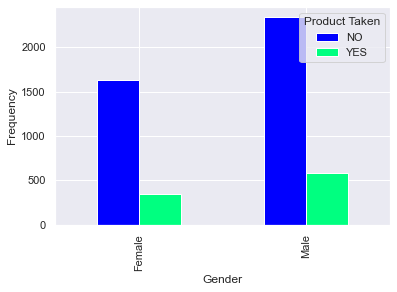

In [249]:
fig = plt.figure(figsize = (10,6))
tab1 = pd.crosstab(df['Gender'],DataSet['ProdTaken'])
tab1.plot.bar(cmap = "winter")
plt.ylabel("Frequency")
plt.legend(['NO', 'YES'],loc = "upper right", title="Product Taken")

##### Observations
- Male customers purchase the travel packages more than Female ones. 

<u><b> PRODTAKEN v/s OTHER ATTRIBUTES </b></u>

In [212]:
chk1 = ['PitchSatisfactionScore', 'ProductPitched', 'NumberOfFollowups','PreferredPropertyStar','Occupation','MaritalStatus','Designation','CityTier','TypeofContact']

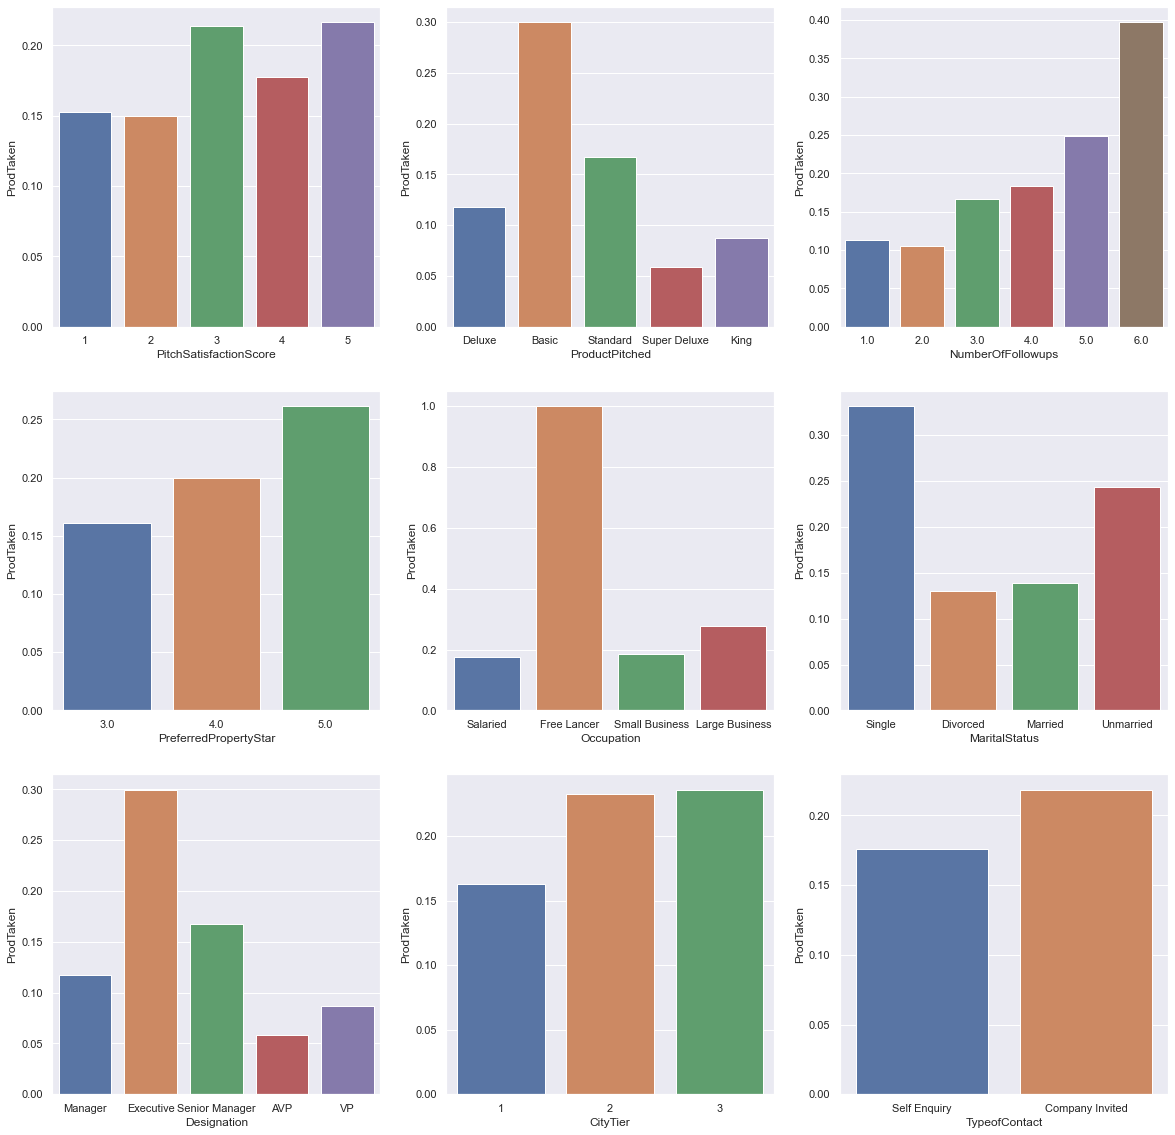

In [259]:
fig=plt.figure(figsize=(20,20))
for i,col in enumerate(chk1):
    ax=fig.add_subplot(3,3,i+1)
    sns.barplot(x=col,y='ProdTaken',data=df,ci=None)


##### Observations
<br>The graphs above average the numbers for the customers that have taken the travel package with those who don't across all atrributes and their subdivisions. <br>
- Pitch Satisfaction score of 3 and 5 have higher number of customers that have purchased the travel packages
- Basic Packages are the most attactive products with most customers preferring the same
- An increase in the number of follow ups results in the increase of purchase of travel packages purchased.
- Preferred property star of 5 has the most number of products taken. 
- ALL customers who work as free lancers have purchased the travel packages. 
- Single Customers account for the people that purchase the most travel packages. 
- Executives account for the people that purchase the most travel packages. 
- Despite most people living in the City Tier 1 and having better facilities, they purchase the least amount of packages.
- When the customer is company invited, they are more likely to purchase travel packages. 

<u><b> PRODUCT PITCHED v/s PRODUCT TAKEN </b></u>

<Figure size 720x432 with 0 Axes>

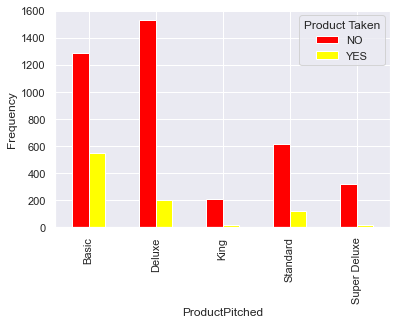

In [218]:
fig = plt.figure(figsize = (10,6))
tab2 = pd.crosstab(df['ProductPitched'],DataSet['ProdTaken'])
tab2.plot.bar(cmap = "autumn")
plt.ylabel("Frequency")
plt.legend(['NO', 'YES'],loc = "upper right", title="Product Taken")

##### Observations
- King and Super Deluxe Packages have very few customers that have purchased them and they are also pitched far less that the others. This may be due to the higher prices of these packages.
- Deluxe has the highest number of pitches but is the 3rd least purchased package.
- Basic package has the highest number of customers that have purchased it. 

<u><b> OCCUPATION v/s DURATION OF PITCH </b></u>

<AxesSubplot:xlabel='Occupation', ylabel='DurationOfPitch'>

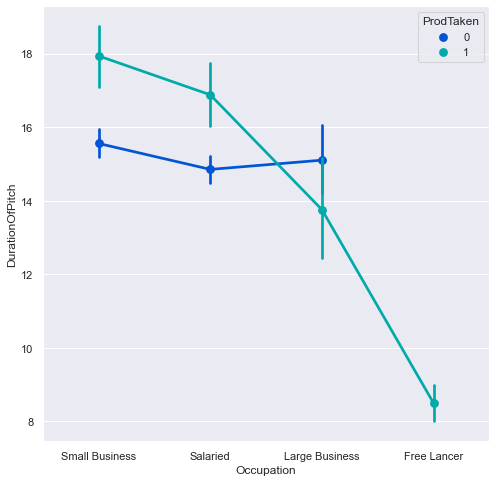

In [260]:
figure = plt.figure(figsize=(8,8))
order = ["Small Business","Salaried","Large Business","Free Lancer"]
sns.pointplot(y=df['DurationOfPitch'],x=df['Occupation'],hue=df['ProdTaken'], palette = 'winter',order = order)


##### Observations
- Customers that are Free Lancers have all purcahsed travel packages.
- Customers that have Small Business are the ones that purchase travel packages with the highest Duration of Pitch followed by Salaried Customers, Large Business Customers and then Free Lancers. 
- For customers that do not purachase the packages, the duration of pitch lasts in the range of 14 to 16

<u><b> NUMBER OF FOLLOWUPS v/s PRODUCT PITCHED </b></u>

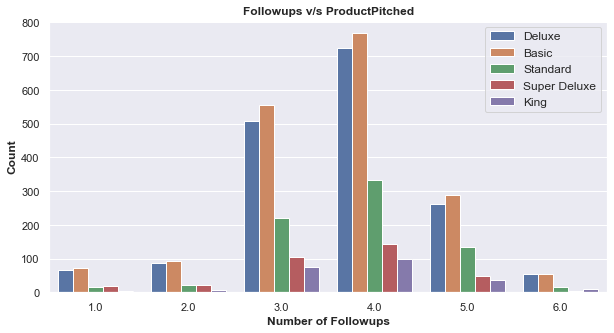

In [263]:
fig = plt.figure(figsize=[10,5]);
sns.countplot(data=df, x='NumberOfFollowups', hue='ProductPitched');
plt.xlabel('Number of Followups', fontweight='bold');
plt.ylabel('Count', fontweight='bold');
plt.legend(fontsize=12);
plt.title('Followups v/s ProductPitched', fontweight='bold');

##### Observations
- Deluxe, Basic and Standard packages mostly have follow ups in the range of 3 to 5.
- King packages only have followups in the range of 3 - 6
- Super Deluxe has follow ups in the range of 1 - 5

<u><b> DURATION OF PITCH v/s PRODUCT PITCHED WHERE PRODUCT TAKEN = YES</b></u>

In [230]:
df20 = df.copy
df20 = df[df['ProdTaken']==1] # DataSet where customers have taken h=the product (Travel Package)

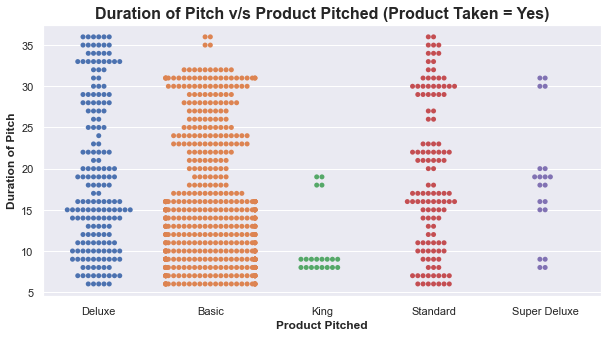

In [264]:
fig = plt.figure(figsize=[10,5]);
sns.swarmplot(data=df20, y='DurationOfPitch', x='ProductPitched');
plt.xlabel('Product Pitched',fontweight='bold');
plt.ylabel('Duration of Pitch', fontweight='bold');
plt.title('Duration of Pitch v/s Product Pitched (Product Taken = Yes)', fontsize=16, fontweight='bold');

##### Observations
- Basic, Deluxe and Standard packages have a mostly even distribution of duration of pitch while King and Super Deluxe have specific pitch durations.
- Most of the Basic Packages purhased have a duration of pitch in the range of 5 - 16.

<u><b> MONTHLY INCOME v/s PRODUCT PITCHED WHERE PRODUCT TAKEN = YES</b></u>

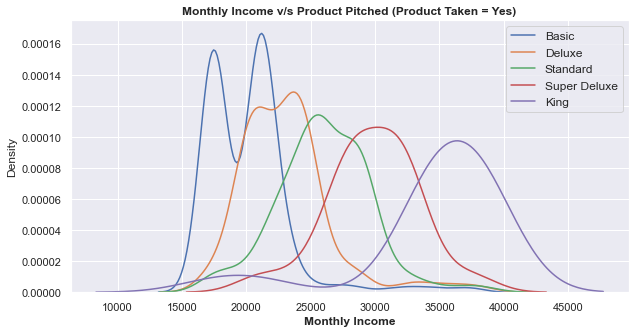

In [266]:
fig = plt.figure(figsize=[10,5]);
sns.distplot(df20.loc[df20['ProductPitched'] == 'Basic','MonthlyIncome'], kde=True, hist=False, label='Basic');
sns.distplot(df20.loc[df20['ProductPitched'] == 'Deluxe','MonthlyIncome'], kde=True, hist=False, label='Deluxe');
sns.distplot(df20.loc[df20['ProductPitched'] == 'Standard','MonthlyIncome'], kde=True, hist=False, label='Standard');
sns.distplot(df20.loc[df20['ProductPitched'] == 'Super Deluxe','MonthlyIncome'], kde=True, hist=False, label='Super Deluxe');
sns.distplot(df20.loc[df20['ProductPitched'] == 'King','MonthlyIncome'], kde=True, hist=False, label='King');
plt.xlabel('Monthly Income', fontweight='bold');
plt.legend(fontsize=12);
plt.title('Monthly Income v/s Product Pitched (Product Taken = Yes)', fontweight='bold');

##### Observations
Customers that purchased the Basic Packages have the lowest Monthly Income followed by Deluxe, Standard, Super Deluxe and King in increasing order of Monthly Income. <br>
- Basic : 15000 - 25000
- Deluxe : 17,500 - 27,500
- Standard : 20,000 - 32,000
- Super Deluxe : 25,000 - 35,000
- King : 30,000 - 42,500

<u><b> AGE v/s PRODUCT PITCHED WHERE PRODUCT TAKEN = YES</b></u>

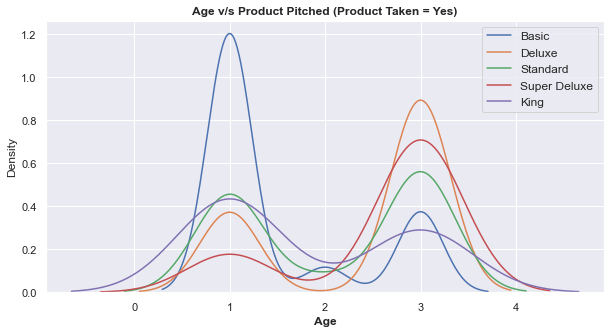

In [269]:
fig = plt.figure(figsize=[10,5]);
sns.distplot(df20.loc[df20['ProductPitched'] == 'Basic','CityTier'], kde=True, hist=False, label='Basic');
sns.distplot(df20.loc[df20['ProductPitched'] == 'Deluxe','CityTier'], kde=True, hist=False, label='Deluxe');
sns.distplot(df20.loc[df20['ProductPitched'] == 'Standard','CityTier'], kde=True, hist=False, label='Standard');
sns.distplot(df20.loc[df20['ProductPitched'] == 'Super Deluxe','CityTier'], kde=True, hist=False, label='Super Deluxe');
sns.distplot(df20.loc[df20['ProductPitched'] == 'King','CityTier'], kde=True, hist=False, label='King');
plt.xlabel('Age', fontweight='bold');
plt.legend(fontsize=12);
plt.title('Age v/s Product Pitched (Product Taken = Yes)', fontweight='bold');

##### Observations
- Tier 1 : Customers from this tier purchase basic packages the most followed by Standard and King in almost equal numbers. Deluxe is next and the Super Deluxe packages with the least number of purchases.
- Tier 2 : There are very few customers from this tier. The Order of packages purchased from those pitched to them in descending order is : King > Basic > Standard > Super Deluxe > Deluxe
- Tier 3 : The Order of packages purchased from those pitched to them in descending order is : Deluxe > Super Deluxe > Standard > Basic > King

<u><b> NUMBER OF TRIPS v/s MARITAL STATUS WHERE PRODUCT TAKEN = YES</b></u>

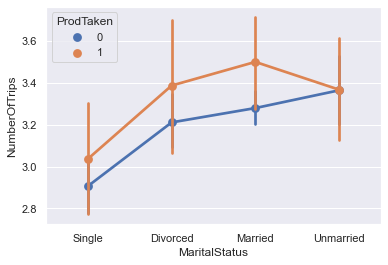

In [248]:
plot2 = sns.pointplot(df['MaritalStatus'],df['NumberOfTrips'],hue = df['ProdTaken'])

##### Observations
- Single, Divorced and Married customers that have purchased travel packages are more than those who have not. 
- Unmarried customers have equal number of people who have purchased and not purchased travel packages. 

### Key Insights based on EDA
- Age seems to be mostly normally distributed <br>
- MonthlyIncome, NumberOfTrips, DurationOfPitch and ProdTaken have very high POSITIVE skew.<br>
- Age, for the most part, seems to be normally distributed. 
- Most of the customers are concentrated around the age range of 30 - 40 years.
- Duration of Pitch is highly positive skewed
- Monthly Income is mostly concentrated around 10,000 to 40,000
- Monthly Income Peaks in the 20,000 to 30,000 range.
- Almost 80% of the dataset has not purchased the travel package
- Most customers found about the travel packages on self inquiry rather than company invited
- Tier 1 has the most number of customers followed by Tier 3 and then by Tier 2.
- Ordered based on development; Tier 1 is the most devloped followed by Tier 2 and then Tier 3.
- Salaried Customers lead the dataset with numbers over 2000 followed by Small Business which also crosses the 2000 mark.
- Large Business Customers are third with a little less than 500 people followed by Free Lancers which arevery few in number which is why they cannot be depicted on the graph due to the large scale. 
- Most customers are Male accounting for 60% of the dataset.
- Female Customers account for 40% of the dataset.
- Most customers have 3 people visiting along with them, accounting for almost 2300 customers.
- Followed by 2 and 4 people, each of which have customers in the range of 1000 - 1500 
- Almost 40% of the Dataset has 4 followups done by the sales person
- It is followed by 3 and 5 followups each accounting for 30% and 16% of the dataset.
- 2,1 and 6 followups account for less then 10% of the dataset together
- Most widely pitched travel package is the Basic Travel Package followed by the Deluxe, King, Standard and Super Deluxe
- The most Preferred Property Star is 3 accounting for 61% of the dataset followed by 4 at 18.8% and 5 at 18.7%
- Over 2000 customers are married then followed by Divorced and Single which are in the same range
- Least number of customers are unmarried. 
- Most customers have 2 - 3 annual trips 
- On the lower range we have 1, 4, 5, 6, 7 and 8 annual trips.
- very few customers have 19 - 22 annual trips and the numbers are almost negligible on a large scale. 
- Most customers do not have a passpirt accounting for 71% of the dataset.
- The most common pitch satisfation score is 3 followed by 5, 1, 4 and 2.
- 62% of the dataset of customers have cars.
- Only 38% of customers do not have cars.
- Most customers have 1 child visiting along with them followed by no, 2 and 3 children.
- Over 1750 customers are excutives at their places of work followed by Managers, Senior Managers, AVP and VP
- The Highest Correlation is between 'Number of Children Visiting' and 'Number of Persons Visiting' with 0.61.<br>
- The Lowest Correlation is between 'Age' and 'ProdTaken' with -0.15 (Negative).<br>
- Since ProdTaken is our target variable; the correlations of other columns with ProdTaken; like Age, CityTier, DurationofPitch, OwnCar, MonthlyIncome and NumberOfTrips have very low correlations.
- - Customers that were pitched the Basic Package have the lowest Monthly Income. 
- Across all the products pitched, the number of customers that opted for the package and did not opt for the package are roughly the same with a little discrpancy in Super Deluxe and King Packages. 
- Customers that were pitched the Super Deluxe and King Packages have the highest monthly income.
- The number of customers that puchased the travel packages decreased with the increase in the duration of pitch. 
- Duration of pitch in the range of 0 - 20 have the highest number of customers that purchased the travel package. 
- Customers working as Executives are the youngest in the dataset in the lower age range followed by Managers and then by Senior Managers in increasing Age Range order. 
- VP and AVP have roughly the same age range and account for the older customers on the dataset spanning mostly 40 - 60 years.
- Male customers purchase the travel packages more than Female ones. 
- Pitch Satisfaction score of 3 and 5 have higher number of customers that have purchased the travel packages
- Basic Packages are the most attactive products with most customers preferring the same
- An increase in the number of follow ups results in the increase of purchase of travel packages purchased.
- Preferred property star of 5 has the most number of products taken. 
- ALL customers who work as free lancers have purchased the travel packages. 
- Single Customers account for the people that purchase the most travel packages. 
- Executives account for the people that purchase the most travel packages. 
- Despite most people living in the City Tier 1 and having better facilities, they purchase the least amount of packages.
- When the customer is company invited, they are more likely to purchase travel packages. 
- King and Super Deluxe Packages have very few customers that have purchased them and they are also pitched far less that the others. This may be due to the higher prices of these packages.
- Deluxe has the highest number of pitches but is the 3rd least purchased package.
- Basic package has the highest number of customers that have purchased it. 
- Customers that are Free Lancers have all purcahsed travel packages.
- Customers that have Small Business are the ones that purchase travel packages with the highest Duration of Pitch followed by Salaried Customers, Large Business Customers and then Free Lancers. 
- For customers that do not purachase the packages, the duration of pitch lasts in the range of 14 to 16
- Deluxe, Basic and Standard packages mostly have follow ups in the range of 3 to 5.
- King packages only have followups in the range of 3 - 6
- Super Deluxe has follow ups in the range of 1 - 5
- Basic, Deluxe and Standard packages have a mostly even distribution of duration of pitch while King and Super Deluxe have specific pitch durations.
- Most of the Basic Packages purhased have a duration of pitch in the range of 5 - 16.
- Customers that purchased the Basic Packages have the lowest Monthly Income followed by Deluxe, Standard, Super Deluxe and King in increasing order of Monthly Income. <br>
1) Basic : 15000 - 25000<br>
2) Deluxe : 17,500 - 27,500<br>
3) Standard : 20,000 - 32,000<br>
4) Super Deluxe : 25,000 - 35,000<br>
5) King : 30,000 - 42,500<br>
- Tier 1 : Customers from this tier purchase basic packages the most followed by Standard and King in almost equal numbers. Deluxe is next and the Super Deluxe packages with the least number of purchases.
- Tier 2 : There are very few customers from this tier. The Order of packages purchased from those pitched to them in descending order is : King > Basic > Standard > Super Deluxe > Deluxe
- Tier 3 : The Order of packages purchased from those pitched to them in descending order is : Deluxe > Super Deluxe > Standard > Basic > King
- Single, Divorced and Married customers that have purchased travel packages are more than those who have not. 
- Unmarried customers have equal number of people who have purchased and not purchased travel packages.

## Data Pre-Processing II
### FEATURE ENGINEERING
<b> This part of Data Preprocessing is done to cater to the Model Building part of the project. It will help in easier development of the Logistic Regression Model and Decision Tree <br></b>
<u>CONTINUATION</u>

#### STEP 3 : FIXING MISSING VALUES
Missing Values across the Numeric Columns are replaced with the median or mode of the column 

In [316]:
medAge = df["Age"].median()
df["Age"].fillna(medAge, inplace=True)

In [317]:
medInc = df["MonthlyIncome"].median()
df["MonthlyIncome"].fillna(medInc, inplace=True)

In [343]:
modeToC = df["TypeofContact"].mode()
df["TypeofContact"].fillna(modeToC[0], inplace=True)

In [328]:
medDur = df["DurationOfPitch"].median()
df["DurationOfPitch"].fillna(medDur, inplace=True)

In [352]:
medF = df["NumberOfFollowups"].median()
df["NumberOfFollowups"].fillna(medF, inplace=True)

In [359]:
medStar = df["PreferredPropertyStar"].median()
df["PreferredPropertyStar"].fillna(medStar, inplace=True)

In [371]:
medNoT = df["NumberOfTrips"].median()
df["NumberOfTrips"].fillna(medNoT, inplace=True)

In [377]:
medchild = df["NumberOfChildrenVisiting"].median()
df["NumberOfChildrenVisiting"].fillna(medchild, inplace=True)

Check if any missing values are still there

In [379]:
df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

No Missing Values Left. 

#### STEP 4 : FIXING DATA TYPE
Conversion of Object Type Column to Category Type.  

In [381]:
df['TypeofContact'] = df['TypeofContact'].astype('category')
df['Occupation'] = df['Occupation'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['ProductPitched'] = df['ProductPitched'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')
df['Designation'] = df['Designation'].astype('category')

In [382]:
df.dtypes

ProdTaken                      int64
Age                          float64
TypeofContact               category
CityTier                       int64
DurationOfPitch              float64
Occupation                  category
Gender                      category
NumberOfPersonVisiting         int64
NumberOfFollowups            float64
ProductPitched              category
PreferredPropertyStar        float64
MaritalStatus               category
NumberOfTrips                float64
Passport                       int64
PitchSatisfactionScore         int64
OwnCar                         int64
NumberOfChildrenVisiting     float64
Designation                 category
MonthlyIncome                float64
dtype: object

#### STEP 5 : OUTLIERS AND THEIR TREATMENT
Identifying the outliers in all columns and treating them <br>

In [387]:
NUM = ['Age','DurationOfPitch','NumberOfPersonVisiting','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','PitchSatisfactionScore','NumberOfChildrenVisiting','MonthlyIncome']



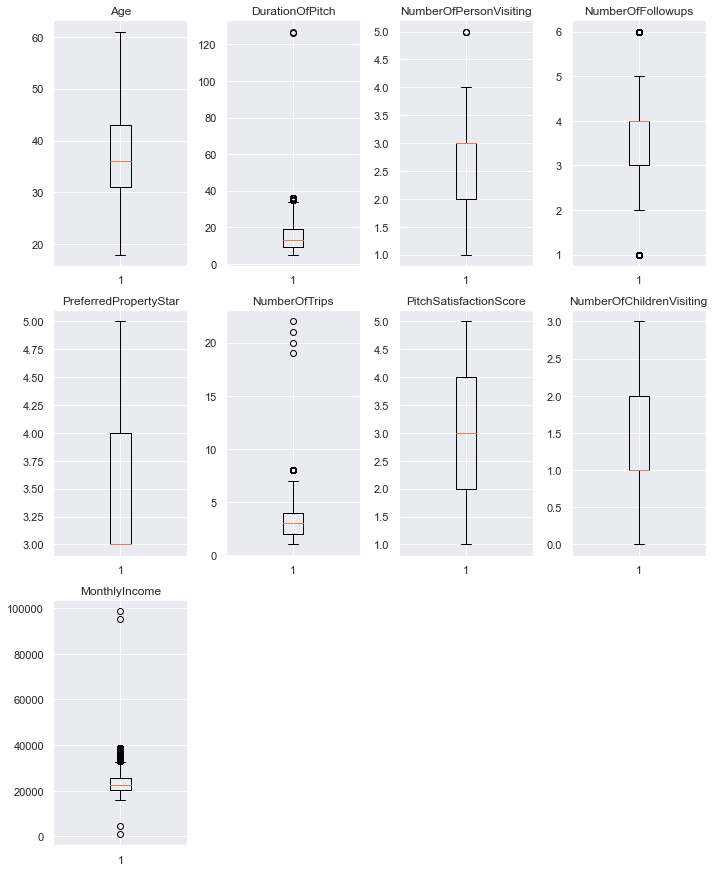

In [388]:
plt.figure(figsize=(10,20))

for i, variable in enumerate(NUM):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

The outliers will be left untreated as firstly, there aren't many outliers. Secondly, these outliers may prove to be important during the building of the boosting and bagging models. 

## Model Building - Bagging
#### STEP 1 : DEFINE X AND Y VARIABLES


In [390]:
y = df[['ProdTaken']] #Dependent Variable
X = df.drop(['ProdTaken'], axis=1) #Independent Variables


#### STEP 2 : CREATING DUMMY VARIABLES
The Categorical Columns in this dataset cannot be read by the equation pertaining to model building. <br>
So we create simple true or false columns with their titular equivalent and column value. These will be used as independent variables without imposing any kind of ordering between the values of that particular column. 

In this case; the Categorical Columns are : <br><i>1) TypeofContact <br>2) Occupation<br>3) Gender<br>4) ProductPitched<br> 5) MaritalStatus<br> 6) Designation</i>


In [391]:
X = pd.get_dummies(X, columns=['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation'], drop_first=False)
X.head()

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,...,ProductPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,41.0,3,6.0,3,3.0,3.0,1.0,1,2,1,...,0,0,0,1,0,0,0,1,0,0
1,49.0,1,14.0,3,4.0,4.0,2.0,0,3,1,...,0,1,0,0,0,0,0,1,0,0
2,37.0,1,8.0,3,4.0,3.0,7.0,1,3,0,...,0,0,0,1,0,0,1,0,0,0
3,33.0,1,9.0,2,3.0,3.0,2.0,1,5,1,...,0,1,0,0,0,0,1,0,0,0
4,36.0,1,8.0,2,3.0,4.0,1.0,0,5,1,...,0,1,0,0,0,0,1,0,0,0


In [392]:
X.dtypes

Age                              float64
CityTier                           int64
DurationOfPitch                  float64
NumberOfPersonVisiting             int64
NumberOfFollowups                float64
PreferredPropertyStar            float64
NumberOfTrips                    float64
Passport                           int64
PitchSatisfactionScore             int64
OwnCar                             int64
NumberOfChildrenVisiting         float64
MonthlyIncome                    float64
TypeofContact_Company Invited      uint8
TypeofContact_Self Enquiry         uint8
Occupation_Free Lancer             uint8
Occupation_Large Business          uint8
Occupation_Salaried                uint8
Occupation_Small Business          uint8
Gender_Female                      uint8
Gender_Male                        uint8
ProductPitched_Basic               uint8
ProductPitched_Deluxe              uint8
ProductPitched_King                uint8
ProductPitched_Standard            uint8
ProductPitched_S

In [393]:
X.shape

(4888, 34)

The Data Frame X containing the independent variables now has 34 columns as opposed to the initial of 19 columns.

#### STEP 3 : SPLITTING THE DATA INTO TRAINING AND TESTING SET
- 70% Training Data Set
- 30% Testing Data Set

In [395]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<u>TRAINING DATASET</u>

In [396]:
X_train.shape

(3421, 34)

In [397]:
y_train.shape

(3421, 1)

<u>TESTING DATASET</u>

In [398]:
X_test.shape

(1467, 34)

In [399]:
y_test.shape

(1467, 1)

<u>FUNCTIONS FOR ACCESSING SCORES AND CONFUSION MATRIX </u>

In [400]:
def get_metrics_score(model,flag=True):

    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision, train_f1, test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1-Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1-Score on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [401]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):

    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### 1) Bagging Classifier

Accuracy on training set :  0.9947383805904706
Accuracy on test set :  0.9052488070892979
Recall on training set :  0.9711538461538461
Recall on test set :  0.581081081081081
Precision on training set :  1.0
Precision on test set :  0.9197860962566845
F1-Score on training set :  0.9853658536585366
F1-Score on test set :  0.7122153209109731


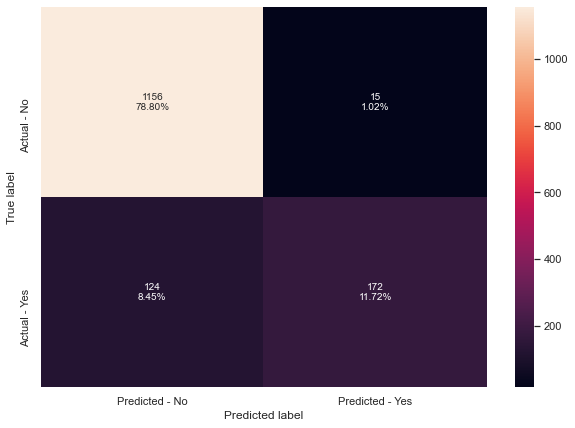

In [404]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(bagging_classifier)

#Creating confusion matrix
make_confusion_matrix(bagging_classifier,y_test)

### 2) Random Forest

Accuracy on training set :  1.0
Accuracy on test set :  0.9086571233810498
Recall on training set :  1.0
Recall on test set :  0.5743243243243243
Precision on training set :  1.0
Precision on test set :  0.9550561797752809
F1-Score on training set :  1.0
F1-Score on test set :  0.7172995780590716


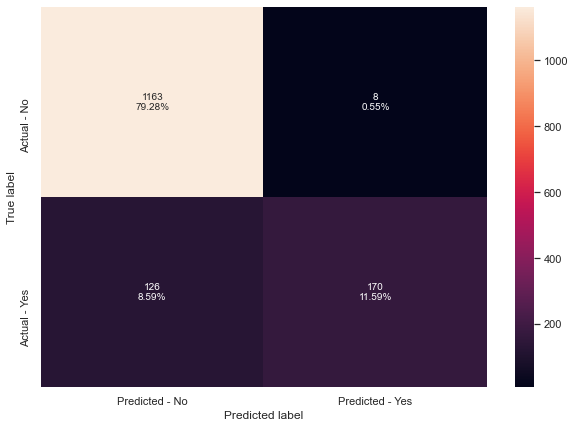

In [405]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(rf_estimator)

#Creating confusion matrix
make_confusion_matrix(rf_estimator,y_test)

### 3) Decision Tree

Accuracy on training set :  1.0
Accuracy on test set :  0.9025221540558964
Recall on training set :  1.0
Recall on test set :  0.722972972972973
Precision on training set :  1.0
Precision on test set :  0.7781818181818182
F1-Score on training set :  1.0
F1-Score on test set :  0.7495621716287216


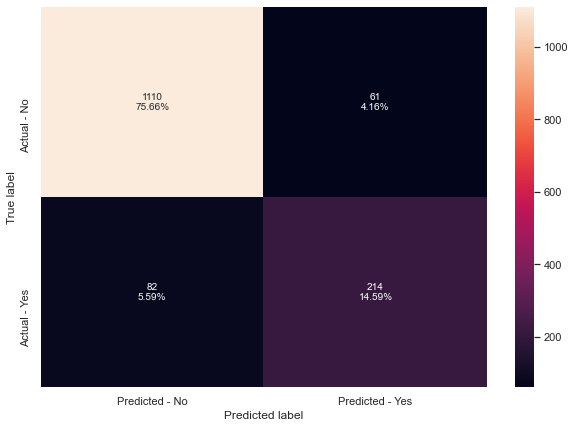

In [406]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(d_tree)

#Creating confusion matrix
make_confusion_matrix(d_tree,y_test)

## Model Performance Improvement - Bagging

### Which metric is right for model performance evaluation?

In this particular case we aim to maximize Recall; the greater the Recall higher the chances of minimizing false negatives because if the model predicts that a customer would not buy a travel package but in reality they do then the company has to take extra measures to ensure they have enough facilities to cater to the people that were misidentified as the facilities will be limited and reserved for those who they expect to purchase the travel packages. 

### Observations on Model Performance

Although the accuracy and precision is high scross all the models; the recall is pretty low for the TEST sets across all the bagging models except for Decision Tree for which it is moderate. <br>

<b>RECALL</b>
- Bagging Classifier : 58.1%
- Random Forest : 57.4%
- Decision Tree : 72.29%
- BEST : Decision Tree

<b>ACCURACY</b>
- Bagging Classifier : 90.5%
- Random Forest : 90.8%
- Decision Tree : 90.2%
- BEST : Random Forest

<b>PRECISION</b>
- Bagging Classifier : 91.9%
- Random Forest : 95.5%
- Decision Tree : 72.8%
- BEST : Random Forest

<b>F1-SCORE</b>
- Bagging Classifier : 71.2%
- Random Forest : 71.7%
- Decision Tree : 74.9%
- BEST : Decision Tree

We can use Hyperparameter Tuning to improve the Model Performance. 


### Hyperparameter Tuning

### 1) Bagging Classifier

In [407]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

<u> TUNED METRICS </u>

Accuracy on training set :  0.9988307512423268
Accuracy on test set :  0.9188820722563054
Recall on training set :  0.9935897435897436
Recall on test set :  0.6351351351351351
Precision on training set :  1.0
Precision on test set :  0.9447236180904522
F1-Score on training set :  0.9967845659163987
F1-Score on test set :  0.7595959595959595


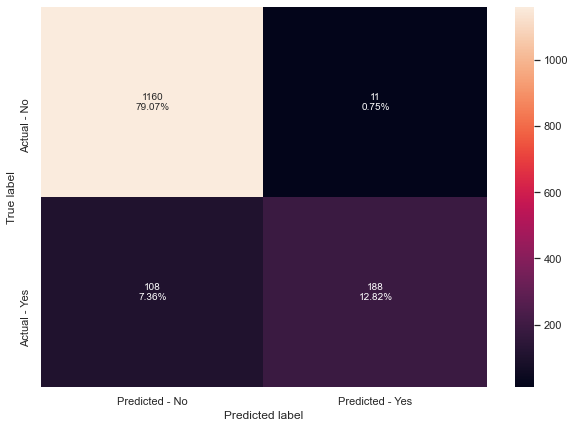

In [408]:
#Calculating different metrics
get_metrics_score(bagging_estimator_tuned)

#Creating confusion matrix
make_confusion_matrix(bagging_estimator_tuned,y_test)

### 2) Random Forest

In [423]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.30,1:0.70},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': [4, 6, 8, 10, None],
                'max_features': ['sqrt','log2',None],
                'n_estimators': [80, 90, 100, 110, 120]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_features=None,
                       n_estimators=80, oob_score=True, random_state=1)

<u> TUNED METRICS </u>

Accuracy on training set :  1.0
Accuracy on test set :  0.918200408997955
Recall on training set :  1.0
Recall on test set :  0.6283783783783784
Precision on training set :  1.0
Precision on test set :  0.9489795918367347
F1-Score on training set :  1.0
F1-Score on test set :  0.7560975609756098


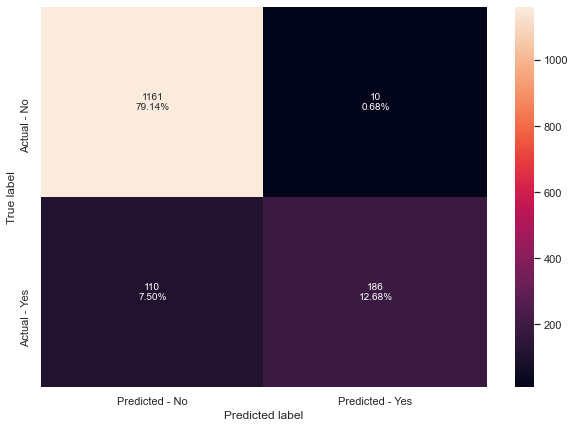

In [424]:

#Calculating different metrics
get_metrics_score(rf_tuned)

#Creating confusion matrix
make_confusion_matrix(rf_tuned,y_test)

<u> FEATURE IMPORTANCE </u>

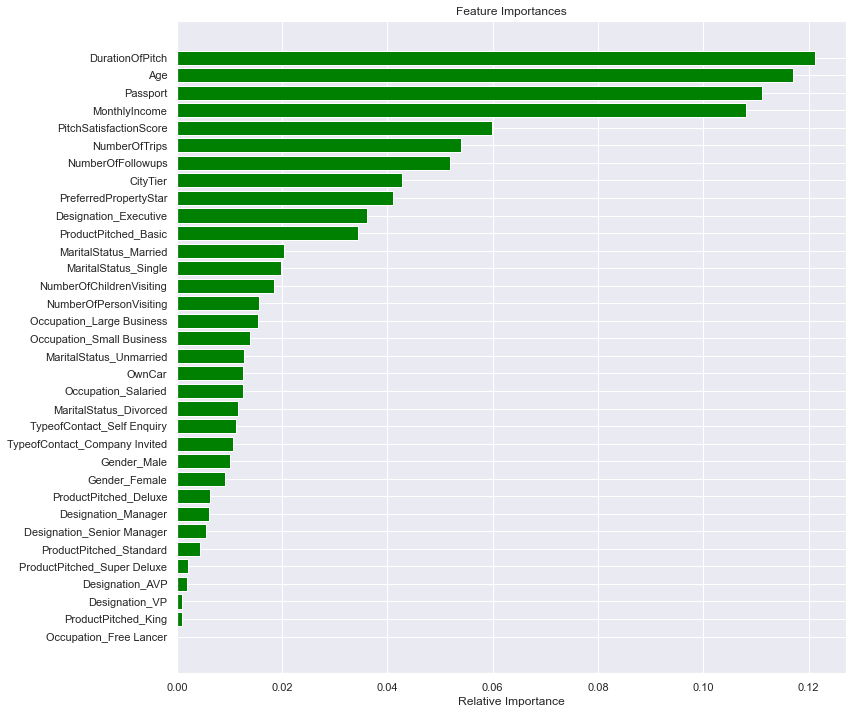

In [446]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

For the Random Forest Model, the features with the highest importance are : <br>
<b>DurationofPitch > Age > Passport > MonthlyIncome </b>

### 3) Decision Tree

In [427]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.30,1:0.70},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,10), 
              'min_samples_leaf': [1, 3, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=9,
                       min_impurity_decrease=0.001, min_samples_leaf=3,
                       random_state=1)

<u> TUNED METRICS </u>

Accuracy on training set :  0.8275358082432037
Accuracy on test set :  0.8098159509202454
Recall on training set :  0.5785256410256411
Recall on test set :  0.5101351351351351
Precision on training set :  0.5247093023255814
Precision on test set :  0.5298245614035088
F1-Score on training set :  0.5503048780487805
F1-Score on test set :  0.5197934595524957


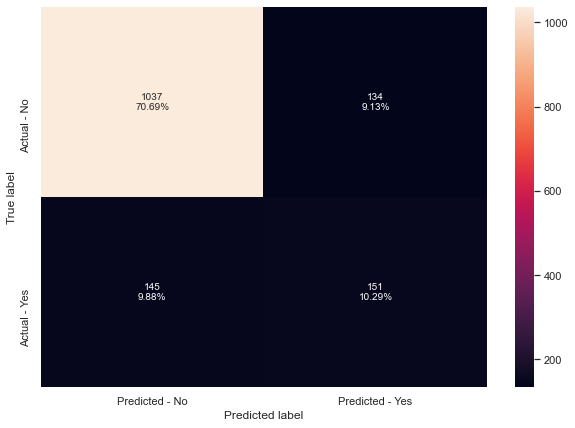

In [411]:
get_metrics_score(dtree_estimator)

make_confusion_matrix(dtree_estimator,y_test)

<u> FEATURE IMPORTANCE </u>

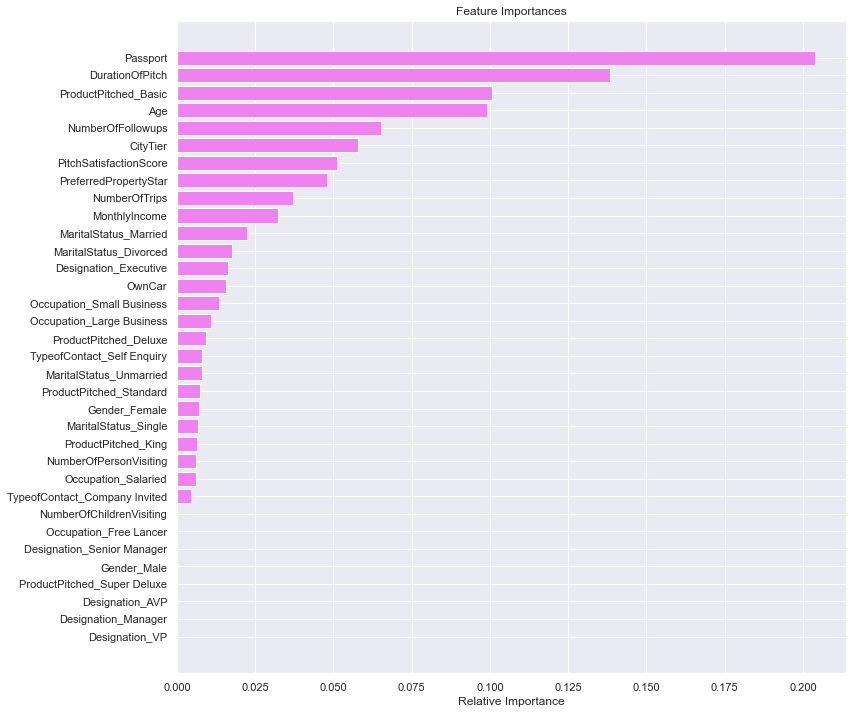

In [444]:
feature_names = X_train.columns
importances = dtree_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

For the Decision Tree Model, the features with the highest importance are : <br>
<b>Passport > DurationofPitch > ProductPitched_Basic > Age </b>

### Comparing the Models

In [491]:
# defining list of models
models = [d_tree, dtree_estimator,rf_estimator, rf_tuned, bagging_classifier,bagging_estimator_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [492]:
comparison_frame1 = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                          'Bagging Classifier','Bagging Classifier Tuned'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 

#Sorting models in decreasing order of test recall
comparison_frame1.sort_values(by='Test_Recall',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision Tree,1.000000,0.902522,1.000000,0.722973,1.000000,0.778182
5,Bagging Classifier Tuned,0.998831,0.918882,0.993590,0.635135,1.000000,0.944724
3,Tuned Random Forest,1.000000,0.918200,1.000000,0.628378,1.000000,0.948980
1,Tuned Decision Tree,0.876060,0.825494,0.798077,0.625000,0.625628,0.560606
4,Bagging Classifier,0.994738,0.905249,0.971154,0.581081,1.000000,0.919786
2,Random Forest,1.000000,0.908657,1.000000,0.574324,1.000000,0.955056


<u> OBSERVATIONS </u>
- From this table we can see that Decision Tree without tuning has given the best Recall for the test set, but we can note that it's Precision is quite low. 
- Tuned Bagging Classifier has very good Accuracy and Precision score with its recall having increased after tuning, although not by much.
- Decision Tree is the only one that saw a fall in the recall value after tuning whereas recall values increased for the other 2 methods after tuning. 
- BEST MODEL - Bagging Classifier Tuned

## Model Building - Boosting



### 1) Adaboost Model

Accuracy on training set :  0.8544285296696872
Accuracy on test set :  0.8343558282208589
Recall on training set :  0.34134615384615385
Recall on test set :  0.30405405405405406
Precision on training set :  0.71
Precision on test set :  0.7086614173228346
F1-Score on training set :  0.4610389610389611
F1-Score on test set :  0.425531914893617


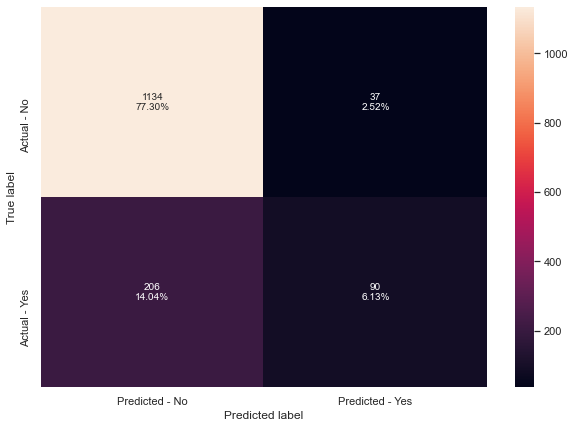

In [429]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(ab_classifier)

#Creating confusion matrix
make_confusion_matrix(ab_classifier,y_test)

### 2) Gradient boost

Accuracy on training set :  0.889505992399883
Accuracy on test set :  0.858214042263122
Recall on training set :  0.4823717948717949
Recall on test set :  0.3716216216216216
Precision on training set :  0.8455056179775281
Precision on test set :  0.8333333333333334
F1-Score on training set :  0.6142857142857143
F1-Score on test set :  0.514018691588785


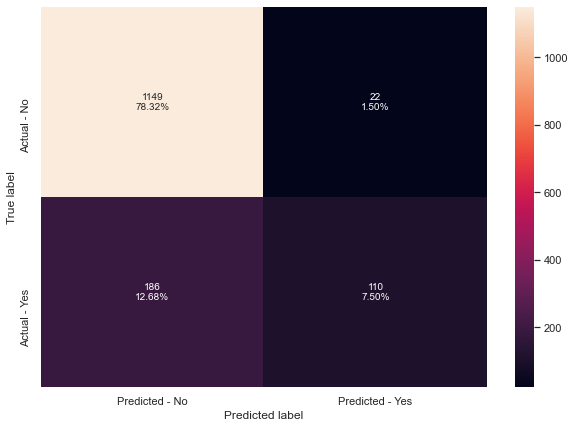

In [430]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(gb_classifier)

#Creating confusion matrix
make_confusion_matrix(gb_classifier,y_test)

### 3) XGboost 

Accuracy on training set :  1.0
Accuracy on test set :  0.9270620313565099
Recall on training set :  1.0
Recall on test set :  0.6790540540540541
Precision on training set :  1.0
Precision on test set :  0.9436619718309859
F1-Score on training set :  1.0
F1-Score on test set :  0.7897838899803536


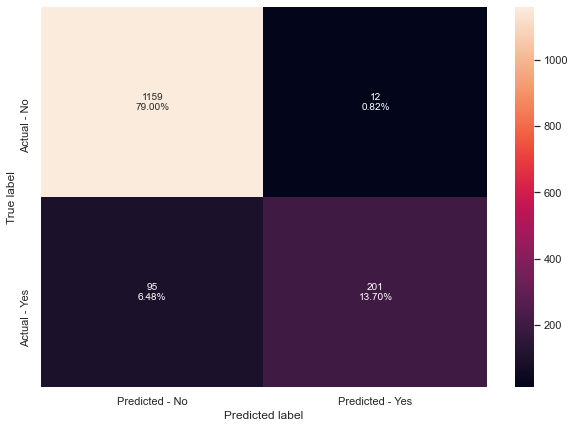

In [431]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(xgb_classifier)

#Creating confusion matrix
make_confusion_matrix(xgb_classifier,y_test)

### 4) Stacking classifier

In [433]:
estimators = [('Random Forest',rf_estimator), ('Gradient Boosting',gb_classifier), ('Decision Tree',d_tree)]

final_estimator = xgb_classifier

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(random_state=1)),
                               ('Decision Tree',
                                DecisionTreeClassifier(random_state=1))],
                   final_estimator=XGBClassifier(base_score=0.5,
                                                 booster='gbtree',
                                                 colsample_bylevel=1,
                                                 colsample_bynode=1,
                                                 colsample_bytree=1,
                                                 eval_metric='logloss',...=0,
                                                 gpu_id=-1,
                                                 importance_type='gain',
                                                 interaction_constraints='

Accuracy on training set :  1.0
Accuracy on test set :  0.9325153374233128
Recall on training set :  1.0
Recall on test set :  0.7601351351351351
Precision on training set :  1.0
Precision on test set :  0.8893280632411067
F1-Score on training set :  1.0
F1-Score on test set :  0.8196721311475409


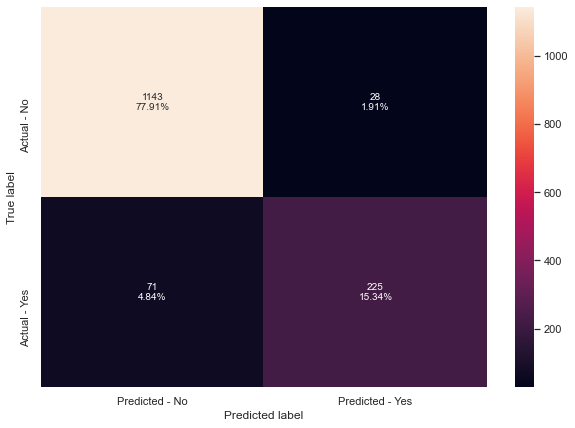

In [434]:
#Calculating different metrics
get_metrics_score(stacking_classifier)

#Creating confusion matrix
make_confusion_matrix(stacking_classifier,y_test)

## Model Performance Improvement - Boosting



### Which metric is right for model performance evaluation?

In this particular case we aim to maximize Recall; the greater the Recall higher the chances of minimizing false negatives because if the model predicts that a customer would not buy a travel package but in reality they do then the company has to take extra measures to ensure they have enough facilities to cater to the people that were misidentified as the facilities will be limited and reserved for those who they expect to purchase the travel packages. 

### Observations on Model Performance

As we can see, the recall is pretty low for the TEST sets in Adaboost and Gradient Boost. XGBoost has moderate recall and stacking performance is higher which is expected as it used 4 other models to derive it's score. <br>
<b>RECALL</b><br>
- Adaboost : 30.4%
- Gradient Boost : 37.1%
- XGBoost : 67.9%
- Stacking : 76.0%
- BEST : Stacking and XGBoost

<b>ACCURACY</b>
- Adaboost : 83.4%
- Gradient Boost : 85.8%
- XGBoost : 92.7%
- Stacking : 93.2%
- BEST : Stacking and XGBoost

<b>PRECISION</b>
- Adaboost : 70.8%
- Gradient Boost : 83.3%
- XGBoost : 94.3%
- Stacking : 88.9%
- BEST : XGBoost

<b>F1-SCORE</b>
- Adaboost : 42.5%
- Gradient Boost : 51.4%
- XGBoost : 78.9%
- Stacking : 81.9%
- BEST : Stacking and XGBoost

We can use Hyperparameter Tuning to improve the Model Performance. 


### 1) Adaboost Model

In [436]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,100,10),
    "learning_rate": [1, 0.1, 0.5, 0.01]
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1, n_estimators=90, random_state=1)

<u> TUNED METRICS </u>

Accuracy on training set :  0.9821689564454837
Accuracy on test set :  0.8882072256305386
Recall on training set :  0.9262820512820513
Recall on test set :  0.6216216216216216
Precision on training set :  0.9747048903878583
Precision on test set :  0.7796610169491526
F1-Score on training set :  0.9498767460969598
F1-Score on test set :  0.6917293233082706


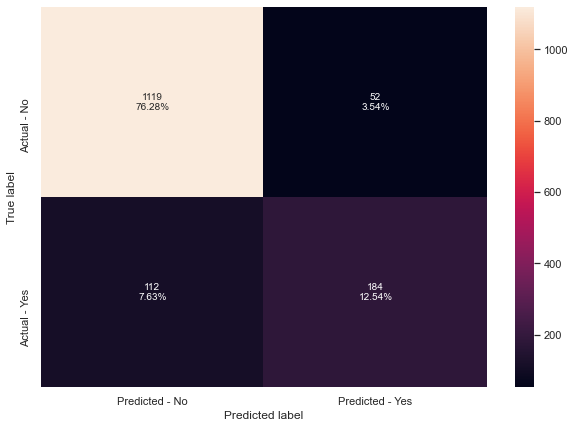

In [437]:
#Calculating different metrics
get_metrics_score(abc_tuned)

#Creating confusion matrix
make_confusion_matrix(abc_tuned,y_test)

<u> FEATURE IMPORTANCE </u>

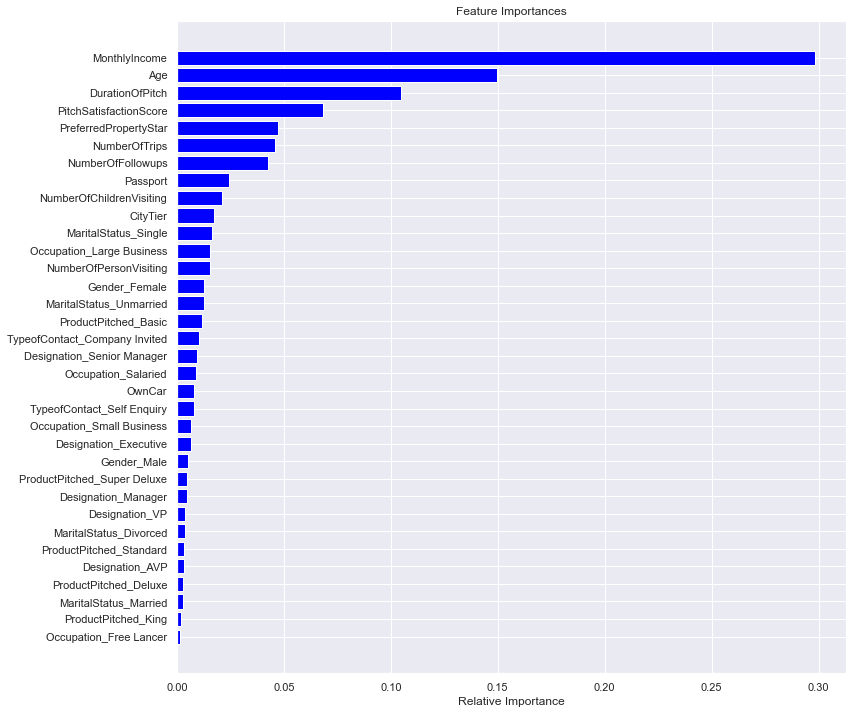

In [450]:
feature_names = X_train.columns
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

For the Adaboost Model, the features with the highest importance are : <br>
<b>MonthlyIncome > Age > DurationOfPitch > PitchSatisfactionScore </b>

### 2) Gradient boost

In [439]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50,200,25),
    "subsample":[0.7,0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=175, random_state=1,
                           subsample=0.7)

<u> TUNED METRICS </u>

Accuracy on training set :  0.9155217772581117
Accuracy on test set :  0.8698023176550784
Recall on training set :  0.5993589743589743
Recall on test set :  0.4358108108108108
Precision on training set :  0.9055690072639225
Precision on test set :  0.8431372549019608
F1-Score on training set :  0.721311475409836
F1-Score on test set :  0.5746102449888641


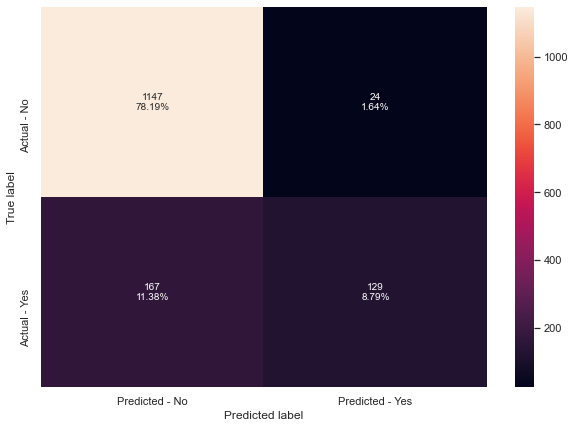

In [440]:
#Calculating different metrics
get_metrics_score(gbc_tuned)

#Creating confusion matrix
make_confusion_matrix(gbc_tuned,y_test)

<u> FEATURE IMPORTANCE </u>

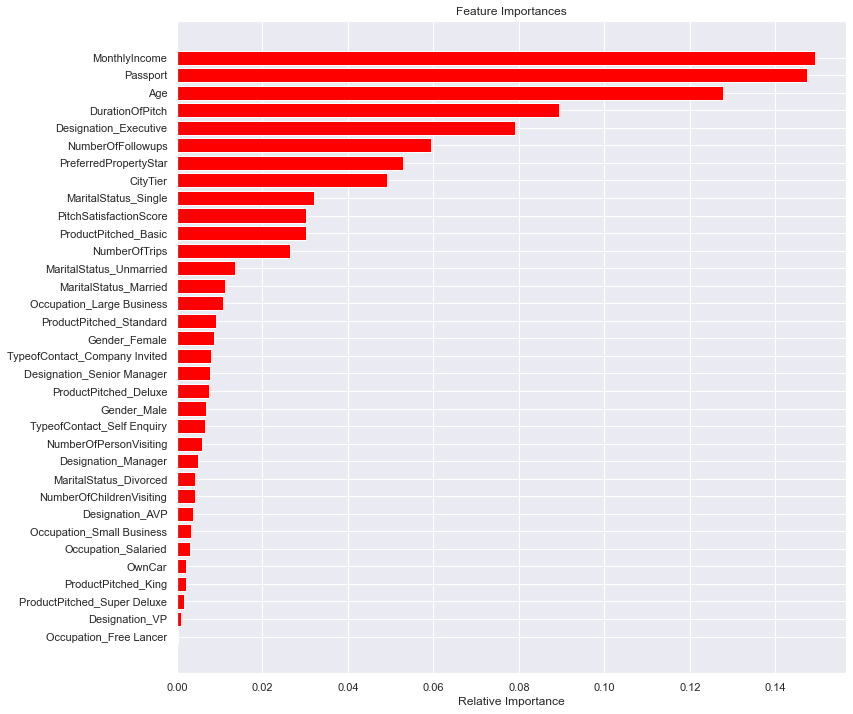

In [452]:
feature_names = X_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

For the Gradient Boost Model, the features with the highest importance are : <br>
<b>MonthlyIncome > Passport > Age > DurationOfPitch </b>

### 3) XGboost 

In [458]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": [75,100,125,150],
    "subsample":[0.7, 0.8, 0.9, 1],
    "colsample_bytree":[0.7, 0.8, 0.9, 1],
    "colsample_bylevel":[0.7, 0.8, 0.9, 1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=125, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

<u> TUNED METRICS </u>

Accuracy on training set :  1.0
Accuracy on test set :  0.9263803680981595
Recall on training set :  1.0
Recall on test set :  0.6959459459459459
Precision on training set :  1.0
Precision on test set :  0.9196428571428571
F1-Score on training set :  1.0
F1-Score on test set :  0.7923076923076924


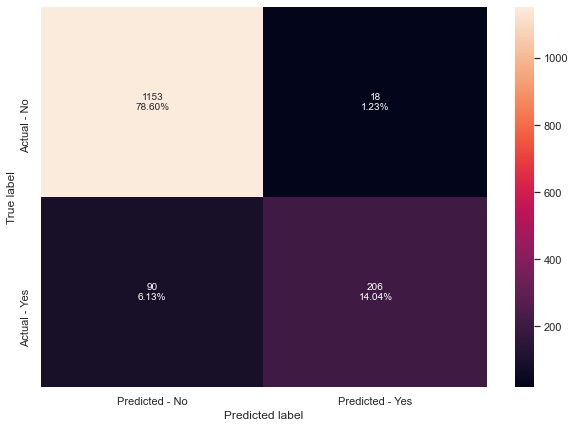

In [459]:
#Calculating different metrics
get_metrics_score(xgb_tuned)

#Creating confusion matrix
make_confusion_matrix(xgb_tuned,y_test)

<u> FEATURE IMPORTANCE </u>

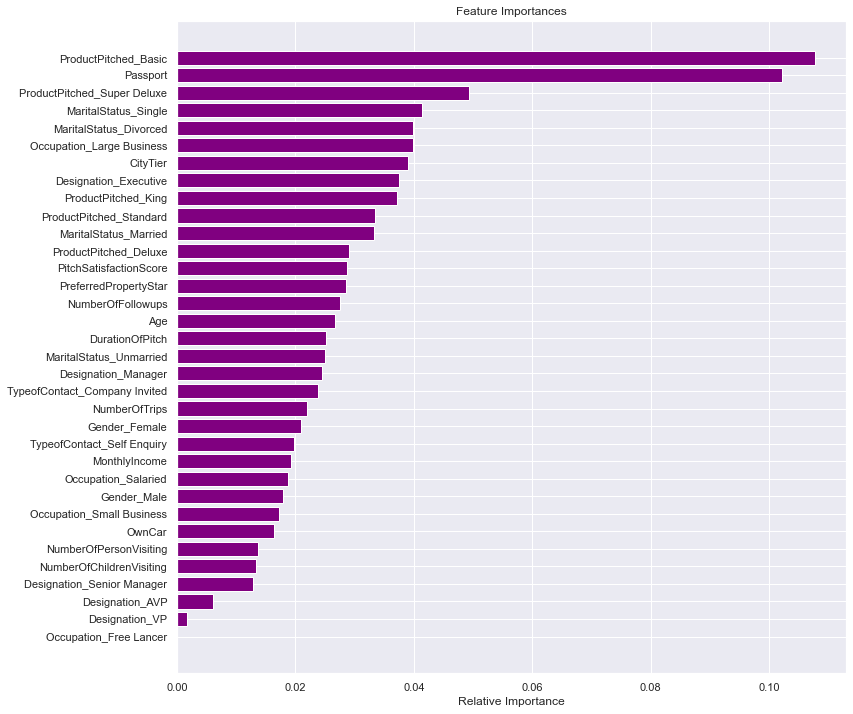

In [460]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

For the XGBoost Model, the features with the highest importance are : <br>
<b>ProductPitched_Basic > Passport > ProductPitched_Super Deluxe > MaritalStatus_Single </b>

### 4) Stacking classifier

In [463]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier_tuned= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier_tuned.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.3,
                                                                     1: 0.7},
                                                       max_features=None,
                                                       n_estimators=80,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           n_estimators=175,
                                                           random_state=1,
                                                           subsample=0.7)),
                               ('Decision Tree',

<u> TUNED METRICS </u>

Accuracy on training set :  0.9935691318327974
Accuracy on test set :  0.9297886843899114
Recall on training set :  0.9935897435897436
Recall on test set :  0.7837837837837838
Precision on training set :  0.9717868338557993
Precision on test set :  0.8560885608856088
F1-Score on training set :  0.98256735340729
F1-Score on test set :  0.818342151675485


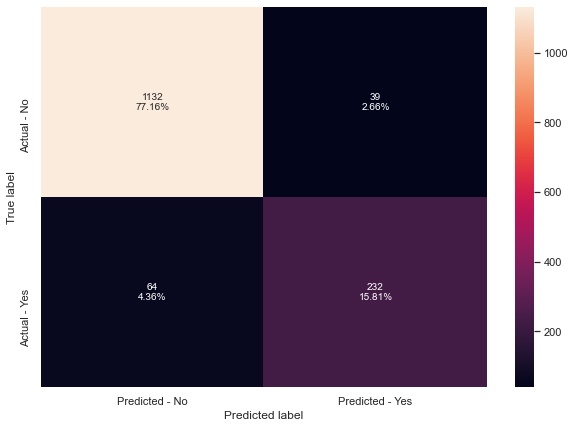

In [464]:
#Calculating different metrics
get_metrics_score(stacking_classifier_tuned)

#Creating confusion matrix
make_confusion_matrix(stacking_classifier_tuned,y_test)

### Comparing the Models - Model Performance Evaluation

In [485]:
comparison_frame = pd.DataFrame({'Model':['Adaboost Model','Gradient Boost','XGboost','Stacking Classifier','Tuned Adaboost Model','Tuned Gradient Boost','Tuned XGboost','Tuned Stacking Classifier'], 'Train_Recall':[0.34,0.48,1,1,0.92,0.59,1,0.99], 'Test_Recall':[0.30,0.37,0.67,0.76,0.62,0.43,0.69,0.78],'Train_Precision':[0.71,0.84,1,1,0.97,0.90,1,0.97], 'Test_Precision':[0.70,0.83,0.94,0.88,0.77,0.84,0.91,0.85], 'Train_Accuracy':[0.85,0.88,1,1,0.98,0.91,1,0.99], 'Test_Accuracy':[0.83,0.85,0.92,0.93,0.88,0.86,0.92,0.92]}) 
comparison_frame

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)


,Model,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_Accuracy,Test_Accuracy
7,Tuned Stacking Classifier,0.99,0.78,0.97,0.85,0.99,0.92
3,Stacking Classifier,1.00,0.76,1.00,0.88,1.00,0.93
6,Tuned XGboost,1.00,0.69,1.00,0.91,1.00,0.92
2,XGboost,1.00,0.67,1.00,0.94,1.00,0.92
4,Tuned Adaboost Model,0.92,0.62,0.97,0.77,0.98,0.88
5,Tuned Gradient Boost,0.59,0.43,0.90,0.84,0.91,0.86
1,Gradient Boost,0.48,0.37,0.84,0.83,0.88,0.85
0,Adaboost Model,0.34,0.30,0.71,0.70,0.85,0.83


<u>OBSERVATIONS</u>
- Tuned Stacking Classifier has the best Recall for TEST set of 78% although its precision is low
- Tuned XGboots has a recall of 69% with a high precision of 91%
- Best Models - Tuned Stacking Classifier and Tuned XGBoost
- For all models, the recall score increased on tuning but at the cost of some of the other parameters
- We can still work on Improving the recall scores across all the models.
- Precision and Accuracy values are mostly high across the models so it is not imperative to work on improving them.

## Actionable Insights & Recommendations



### Recommendations
- Most of the customers find about travel packages through self inquiry, but it is the ones that are invited by the company itself that are more likely to buy the packages. Therefore, it is important for the company to focus more on inviting people from varied demographics for higher conversion rates of purcahse.
- Specific packages tailor made for people ove varying incomes and deisgnations. Those with lower deignations and income can be offered cheaper packages within thier budget and more luxurious ones for those with higher incomes and higher designations. 
- Tier 1 has better facilities and therefire should be more expensive. People living her should be well off, therefore more expensive packages can be marketed here. Yet they have lower number of packages purcahsed. Their interests can be taken into consideration and packages can be tailor made to those.
- Free lancing cutomers have all purcahsed packages but are lower in number. Therefore, company can focus more on marketing to them.
- Single Customers account for the people that purchase the most travel packages. So specific packages can be further marketed to them. 
- Preferred property star of 5 has the most number of products taken. So properties with these ratings should be included more in travel packages. 
- King and Super Deluxe Packages have very few customers that have purchased them and they are also pitched far less that the others. Some consideration to price can be given here to make it more accessible to people in the slightly lower income range.
- The number of customers that puchased the travel packages decreased with the increase in the duration of pitch. Therefore, special care should be given to how long the packages are pitched so as to not disinterest the customers. 
- Increased follow ups encourage more purcahsed products so it is imperative to follow up regularly.
- Tailored packages corresponding to Age. 
- International Travel Packages catering to the customers with passports.

